# Business Understanding and Overview

Customer Purchase Analysis is one ofthe key areas for a Store at any level. By collecting information about the customer and recording about his purchases, the store can analyse the patterns and devise suitable strategies to attract the customer and make more profits.

In this problem statement, given various information about customers and their details, predict if a particular customer will make a purchase>

## Problem Statement:- Predict whether a customer will purchase from the store given data about customer’s information and past behaviour.

Let us begin by importing all the necessary libraries that I can use as of now and if there are anymore libraries that I'll need, Ill import them when I wanna use it

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msg
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head(25)

,ID,STATE,AGE,OCCUPATION,INCOME_GROUP,CUSTOMER_SINCE,LOYALTY_PROGRAM,PAST_PURCHASE,PURCHASE
0,1,Uttar Pradesh,28,,Low,2018,No,4937,No
1,2,Madhya Pradesh,27,Salaried,Low,2018,No,10834,No
2,3,West Bengal,62,,High,2013,NaN,8610,Yes
3,4,Tamil Nadu,27,Salaried,Low,2018,No,14374,Yes
4,5,Uttar Pradesh,40,Self employed,High,2015,No,13158,No
5,6,Maharashtra,28,Salaried,Low,2018,No,5159,No
6,7,Tamil Nadu,68,,High,2010,NaN,12780,Yes
7,8,Maharashtra,45,Self employed,Medium,2018,No,5018,No
8,9,West Bengal,56,Self employed,Medium,2014,Yes,7238,No
9,10,Tamil Nadu,67,,High,2010,Yes,25120,Yes


## *Inference about Columns and their Meanings*:-

ID - Unique identifier of a customer

STATE - Customer’s state of residence

AGE - Customer’s age

OCCUPATION - Customer’s occupation

INCOME_GROUP - Customer’s income band

CUSTOMER_SINCE - Year in which the customer made the first purchase at the store

LOYALTY_PROGRAM - Is the customer enrolled for the loyalty program? (Yes/No)

PAST_PURCHASE - Total amount of past purchase from the same store

PURCHASE - Indicates whether a customer purchases (Yes/No) a product when approached by the store.

### Before proceeding with the analysis, for aesthetic purposes, I will be renaming all the columns into Camel case

In [4]:
df.columns = pd.Series(df.columns).apply(lambda x: x[0]+x[1:].lower())

In [5]:
df.columns

Index(['Id', 'State', 'Age', 'Occupation', 'Income_group', 'Customer_since',
       'Loyalty_program', 'Past_purchase', 'Purchase'],
      dtype='object')

Let us now proceed with the exploratory data analysis

## Target Variable

The Target Variable here is the "Purchase" column which indicates whether a person is going to buy at the store next time or not.

Let us see its frequency before proceeding further

Text(0.5, 1.0, "Frequency of Customer's Decision")

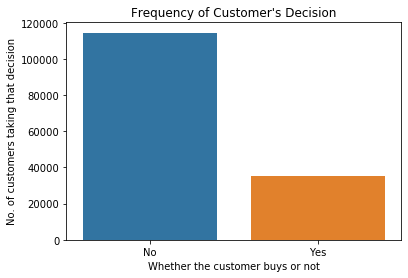

In [6]:
sns.barplot(df['Purchase'].unique(),df['Purchase'].value_counts())
plt.xlabel('Whether the customer buys or not')
plt.ylabel('No. of customers taking that decision')
plt.title("Frequency of Customer's Decision")

In [7]:
n = len(df[df['Purchase']=='No'])
y = len(df[df['Purchase']=='Yes'])
print(f"Customers not buying is {n/len(df)*100} percent and buying is {y/len(df)*100} percent")

Customers not buying is 76.358 percent and buying is 23.642 percent


## Inferences:-

1. Data is highly imbalanced. The ratio of No to Yes is almost 76:24 percent


2. Most of the customers are predicted to not buy from the store once again. This might be due to a multitude of reasons


3. We need to analyse the data with other features while taking the target values seperately to get some insights



## Initial Intuition from Data

In [8]:
df.shape

(150000, 9)

This dataset has a total information of 150000 different customers and 9 features for each customer

In [9]:
df.duplicated().sum()

0

As we can see, there are no duplicate values in the dataset which is a good thing as no customer's information has been recorded twice by mistake

In [10]:
df.isnull().sum()

Id                     0
State                  0
Age                    0
Occupation             0
Income_group           0
Customer_since         0
Loyalty_program    17824
Past_purchase          0
Purchase               0
dtype: int64

The presence of Null Values are being indicated only in the **Loyalty_program** column of the dataset however we can clearly see some empty strings in the **Occupation" and Income Group** column when we used the head function

These are by practise null values but arent being detected by the Pandas isnull() function as theyre in the form of strings

In [11]:
df.dtypes

Id                  int64
State              object
Age                 int64
Occupation         object
Income_group       object
Customer_since      int64
Loyalty_program    object
Past_purchase       int64
Purchase           object
dtype: object

In [12]:
df.describe()

,Id,Age,Customer_since,Past_purchase
count,150000.000000,150000.000000,150000.000000,150000.000000
mean,75000.500000,43.805660,2015.507960,11244.207287
std,43301.414527,14.828219,2.685645,8458.166886
min,1.000000,23.000000,2008.000000,208.000000
25%,37500.750000,30.000000,2013.000000,6034.750000
50%,75000.500000,43.000000,2017.000000,8926.000000
75%,112500.250000,54.000000,2018.000000,13636.000000
max,150000.000000,85.000000,2019.000000,103520.000000


## Initial Inferences about the Numerical Columns:-

1. We can ignore the "Id" column for analysis purposes as these just indicate the customer numbers from 1 to 150000.



2. The average age of all the customers is 43 years while the customer with least age is 23 and the oldest customer is 85 years old. This clearly shows that the store has customers from all age-groups 



3. The high concentration of the customers are the oneswho have been a customer since 2015 while the oldest customer is from 2008 and the newest customer is from 2019.



4. Looking at the past purchases of customers, we can see that the minimum purchase has been done for Rs 208 while the maximum is for Rs 103520 while the average customer spends Rs. 11244 when he visits. This means that the store is certainly no ordinary store as it has items worth Rs. 100k that can be bought too. (**An electronics store maybe?**)



In [13]:
df.describe(exclude=np.number)

,State,Occupation,Income_group,Loyalty_program,Purchase
count,150000,150000,150000,132176,150000
unique,34,4,4,2,2
top,Maharashtra,Self employed,Low,No,No
freq,21968,61375,63523,88182,114537


## Initial Inferences about the Categorical Columns:-

1. We can see that this store has customers from 34 different states in India. This certainly includes Union Territories as well as there are only 29 states. Since it has such a diversity of customers, we can either recognise it as a famous store at a location in India which is popular throughout or it is an online store


2. Maharashtra has the highest number of customers(21968) out of all states while a whooping total of 61375 customers are Self-Employed


3. Mostly low income people are the customers of the store. This is kind of contradicting with the fact that the average purchase of a customer is around Rs.11000


4. Most of the customers who gave an answer for Loyalty Program arent using the Loyalty Program Scheme

## Assumptions as of now:-

1. This dataset is probably the data of a highly renowed store that has its branches across all over India or an Online Shopping firm


2. The Purchase Column is highly correlated with Loyalty Program column


3. The Age and Customer Since columns must be correlated

## Data Cleaning and Exploratory Data Analysis

Since there are less number of columns, let us look at each column and their unique values one by one to understand if they have null values or not

In [14]:
print(type(np.nan))

<class 'float'>


In [15]:
print(df['Id'].dtype,df['Id'].isnull().sum())

int64 0


We can clearly see that the "Nan" value is of the type "Float" while the column "Id" is of type "Integer" and there are no null values in it. So the Id column is clear of null values

Lets move on with the next column

In [16]:
df['State'].value_counts().count()

34

It is given that there are 34 states in total while we only have 29 states and 7 Union territories in India

In [17]:
df['State'].unique()

array(['Uttar Pradesh', 'Madhya Pradesh', 'West Bengal', 'Tamil Nadu',
       'Maharashtra', 'Kerala', 'Goa', 'Karnataka', 'Andhra Pradesh',
       'Telangana', 'Chandigarh', 'Nagaland',
       'Andaman and Nicobar Islands', 'Tripura', 'Delhi',
       'Himachal Pradesh', ' ', 'Puducherry', 'Sikkim', 'Gujarat',
       'Odisha', 'Bihar', 'Punjab', 'Arunachal Pradesh', 'Haryana',
       'Rajasthan', 'Uttarakhand', 'Jammu and Kashmir', 'Assam',
       'Manipur', 'Mizoram', 'Jharkhand', 'Chhattisgarh', 'Meghalaya'],
      dtype=object)

Observing this list, we can clearly see that this contains a list of **all 29 states**, **4 union territories** and **an empty string**

In [18]:
a = df.loc[df['State']==' ']
len(a)

1842

There are 1842 instances in which there is an empty string in the place of a state.


We can just drop these rows as these might contain other useful information about customers. 


Let us see how we can fill the values in this column with **nan** and treat all these nan values at once

In [19]:
df['State'].replace(' ',np.nan,inplace=True)

In [20]:
df['State'].isnull().sum()


#We can see that all the empty strings are replaced by null values

1842

Let us now proceed with "Age" column

In [21]:
print(df['Age'].dtype,df['Age'].isnull().sum())

int64 0


**Once again, we can see that the "Age" column has no null values**

In [22]:
df['Occupation'].value_counts()

Self employed    61375
Salaried         44214
                 42777
Business          1634
Name: Occupation, dtype: int64

We can see that this column has a huge chunk of empty strings which are almost 30% size of the total entries.

Let us now replace these values with null values so we can treat them in a while

In [23]:
df['Occupation'].replace(' ',np.nan,inplace=True)

In [24]:
df['Occupation'].isnull().sum()

#Moving on

42777

In [25]:
df['Income_group'].value_counts()

Low       63523
High      41808
Medium    41232
           3437
Name: Income_group, dtype: int64

"Income Group" also has empty strings but its frequency is quite less compared to the total size so we can potentially drop the columns but lets just fill these with null values for now

In [26]:
df['Income_group'].replace(' ',np.nan,inplace=True)
df['Income_group'].isnull().sum()

3437

In [27]:
df['Customer_since'].isnull().sum()


#No null values in Customers_since column

0

In [28]:
print(df['Loyalty_program'].value_counts(),'\n',df['Loyalty_program'].isnull().sum())

No     88182
Yes    43994
Name: Loyalty_program, dtype: int64 
 17824


"Loyalty_program" doesn't have an empty string unlike the other categorical columns and there are already null values in it so lets skip it for now

In [29]:
df['Past_purchase'].isnull().sum()

#No null values

0

In [30]:
df['Purchase'].isnull().sum()

#No null values

0

### Finished converting all the unindentified values into null values

## Treating Null Values 

Missingno library offers a very nice way to visualize the distribution of NaN values. Missingno is a Python library and compatible with Pandas.

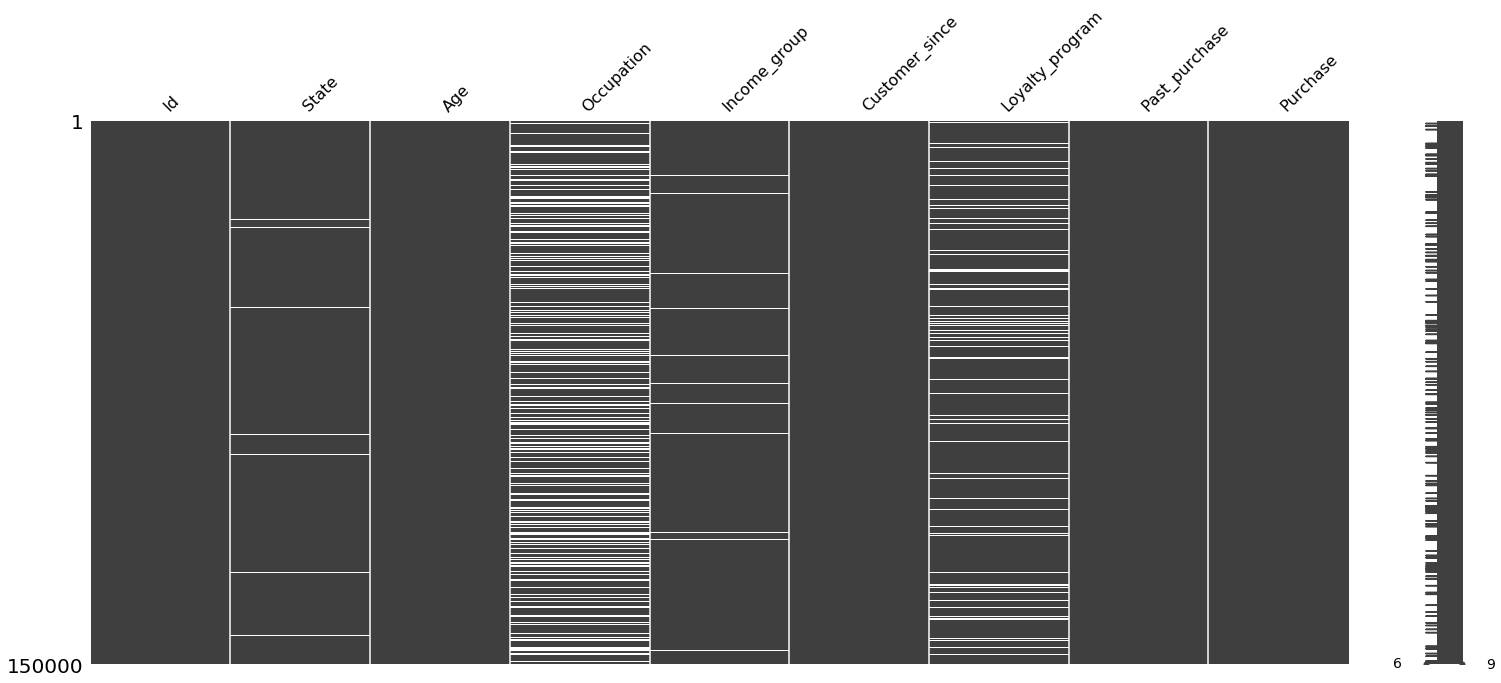

In [31]:
msg.matrix(df)

We can clearly see that **State** and **income_group** columns have very less missing values while **Occupation** and **Loyalty_Program** have high number of missing values

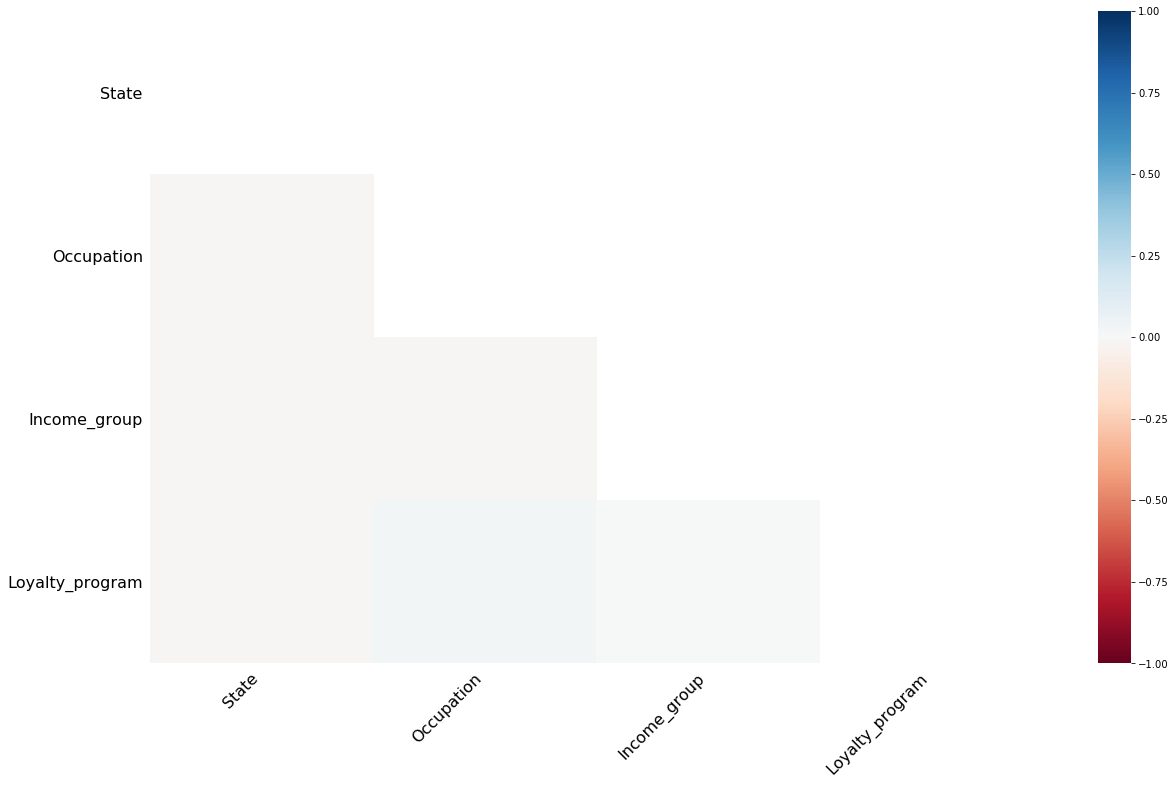

In [32]:
msg.heatmap(df)

From this heatmap and by the matrix in missingno, we can clearly see that the values missing in the columns are not correlated at all.

This means that each column has missing values that are unique and their occurance doesnt depend upon the occurance of other missing values

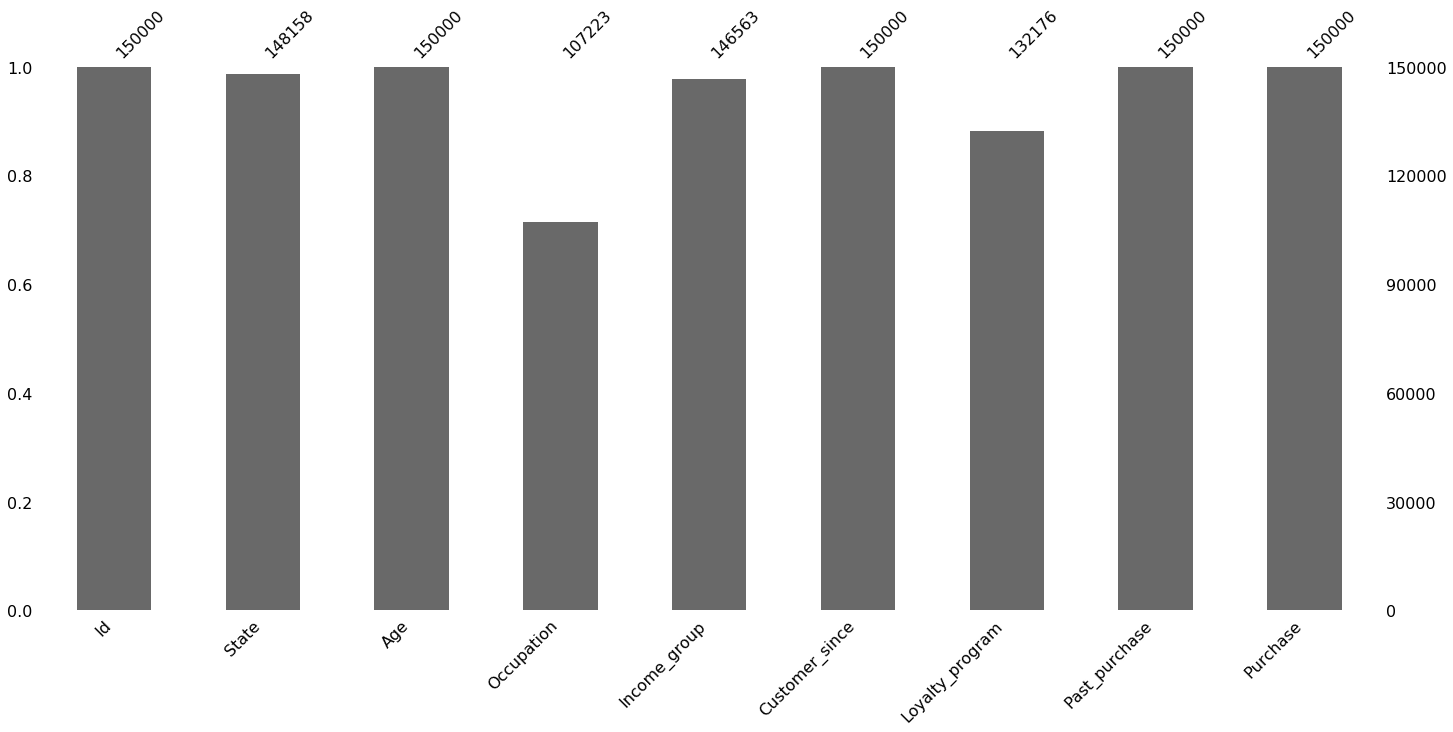

In [33]:
msg.bar(df)

## Inference:-


1. In the given 9 columns in the dataset, 4 columns have missing values in them whose percentages range from 0% to less than 28%.

2. Out of the columns which have missing values, no column is correlated with one another which can be observed from Missingno matrix and heatmap

In [34]:
print(f'{df.isnull().sum()/len(df)}%')

Id                 0.000000
State              0.012280
Age                0.000000
Occupation         0.285180
Income_group       0.022913
Customer_since     0.000000
Loyalty_program    0.118827
Past_purchase      0.000000
Purchase           0.000000
dtype: float64%


As we can see, **Occupation** column has the highest percentage of missing values followed by **Loyalty_program** while the others have very less records.

## My Plan for Treating Nan Values:-

1. Find the correlation of the columns with missing values to the target column and sort them accordingly
2. Identify the columns based on their descending hierarchial order.
3. For highly correlated columns with less missing values, since all the records are important, donot drop them
4. For very low correlated columns with less missing values, impute the nan values with the mode
5. For highly correlated columns with more missing values, use supervised ml algorithms to predict the nan values
6. For very low correlated columns with more missing values, impute accordingly

Let us carry the process to treat the null values now.

Let us start with **State** column

In [35]:
df['State'].unique()

array(['Uttar Pradesh', 'Madhya Pradesh', 'West Bengal', 'Tamil Nadu',
       'Maharashtra', 'Kerala', 'Goa', 'Karnataka', 'Andhra Pradesh',
       'Telangana', 'Chandigarh', 'Nagaland',
       'Andaman and Nicobar Islands', 'Tripura', 'Delhi',
       'Himachal Pradesh', nan, 'Puducherry', 'Sikkim', 'Gujarat',
       'Odisha', 'Bihar', 'Punjab', 'Arunachal Pradesh', 'Haryana',
       'Rajasthan', 'Uttarakhand', 'Jammu and Kashmir', 'Assam',
       'Manipur', 'Mizoram', 'Jharkhand', 'Chhattisgarh', 'Meghalaya'],
      dtype=object)

The **State** column has 34 unique categories so it becomes very difficult to calculate the correlation with the **Purchase** column so let us just use the **Measure of Central Tendency** to fill the nan values

In [36]:
df['State'].value_counts()

Maharashtra                    21968
Tamil Nadu                     17836
Uttar Pradesh                  16400
Karnataka                      11689
Gujarat                         7864
West Bengal                     7751
Telangana                       4783
Andhra Pradesh                  4781
Rajasthan                       4621
Kerala                          3718
Madhya Pradesh                  3680
Delhi                           3572
Bihar                           3225
Haryana                         3197
Punjab                          3113
Odisha                          2773
Assam                           2638
Chhattisgarh                    2366
Jharkhand                       2242
Uttarakhand                     1984
Jammu and Kashmir               1962
Himachal Pradesh                1763
Goa                             1735
Tripura                         1735
Chandigarh                      1583
Puducherry                      1503
Meghalaya                       1231
S

In [37]:
a = list(df.loc[df['State'].isnull()].index)
b,c = [i-1 for i in a],[i+1 for i in a]

In [38]:
sb = pd.DataFrame(df.loc[b]['State'])
sc = pd.DataFrame(df.loc[c]['State'])

Here, I created two Dataframes which shows the name of the states which are **above** and **below the Nan values** in original dataframes.

The reason here is to inspect the percentage of the top 4 values in each dataframe to see if the trend is similar 

In [39]:
a1 = df['State'].value_counts()/len(df)*100
a1

Maharashtra                    14.645333
Tamil Nadu                     11.890667
Uttar Pradesh                  10.933333
Karnataka                       7.792667
Gujarat                         5.242667
West Bengal                     5.167333
Telangana                       3.188667
Andhra Pradesh                  3.187333
Rajasthan                       3.080667
Kerala                          2.478667
Madhya Pradesh                  2.453333
Delhi                           2.381333
Bihar                           2.150000
Haryana                         2.131333
Punjab                          2.075333
Odisha                          1.848667
Assam                           1.758667
Chhattisgarh                    1.577333
Jharkhand                       1.494667
Uttarakhand                     1.322667
Jammu and Kashmir               1.308000
Himachal Pradesh                1.175333
Goa                             1.156667
Tripura                         1.156667
Chandigarh      

In [40]:
a2 = sb['State'].value_counts()/len(sb)*100
a2

Maharashtra                    15.092291
Uttar Pradesh                  12.486428
Tamil Nadu                     11.454940
Karnataka                       7.654723
West Bengal                     6.026059
Gujarat                         5.754615
Andhra Pradesh                  3.528773
Telangana                       3.148751
Rajasthan                       3.094463
Delhi                           2.280130
Haryana                         2.117264
Madhya Pradesh                  2.062975
Bihar                           1.900109
Punjab                          1.900109
Kerala                          1.845820
Jharkhand                       1.737242
Chhattisgarh                    1.628664
Puducherry                      1.628664
Jammu and Kashmir               1.465798
Himachal Pradesh                1.465798
Assam                           1.357220
Meghalaya                       1.248643
Odisha                          1.085776
Tripura                         0.977199
Arunachal Prades

In [41]:
a3 = sc['State'].value_counts()/len(sc)*100
a3

Maharashtra                    14.766558
Tamil Nadu                     11.509229
Uttar Pradesh                  10.586319
Karnataka                       7.111835
West Bengal                     5.754615
Gujarat                         4.668838
Rajasthan                       3.745928
Andhra Pradesh                  3.257329
Telangana                       2.768730
Kerala                          2.660152
Madhya Pradesh                  2.605863
Delhi                           2.497286
Odisha                          2.442997
Punjab                          2.388708
Bihar                           2.388708
Assam                           2.117264
Haryana                         1.900109
Uttarakhand                     1.791531
Chhattisgarh                    1.302932
Puducherry                      1.302932
Sikkim                          1.248643
Tripura                         1.194354
Himachal Pradesh                1.085776
Jammu and Kashmir               1.085776
Jharkhand       

In [42]:
print(sum(a2-a1),sum(a3-a1))

0.41366775244300036 0.41366775244300213


### What did I do here


1. First, I checked the number of times each state is registered in the dataset and stored it in a variable 'a1'.
2. Next, I seperated the indexes of null values in states and selected the indexes one less and one greather than the null values.
3. By checking the percentages of states in the three dataframes(original,null-1,null+1) and comparing them, I found out that the original dataframe's distribution is a lot similar to the null+1 distribution by a minute margin


Now that we have determined that the next value is to be imputed, we can easily do this by using bfill() method in pandas

In [43]:
df['State'].bfill(inplace=True)

In [44]:
df['State'].isnull().sum()

0

**Let us now handle the missing values in other columns by determining their correlations**

In [45]:
from scipy.stats import chi2_contingency

In [46]:
categorical_columns = ['Loyalty_program','Occupation','Income_group']

chi2_check = []
for i in categorical_columns:
    if chi2_contingency(pd.crosstab(df['Purchase'], df[i]))[1] < 0.05:
        chi2_check.append('Reject Null Hypothesis')
    else:
        chi2_check.append('Fail to Reject Null Hypothesis')
res = pd.DataFrame(data = [categorical_columns, chi2_check] 
             ).T 
res.columns = ['Column', 'Hypothesis']


check = {}
for i in res[res['Hypothesis'] == 'Reject Null Hypothesis']['Column']:
    dummies = pd.get_dummies(df[i])
    bon_p_value = 0.05/df[i].nunique()
    for series in dummies:
        if chi2_contingency(pd.crosstab(df['Purchase'], dummies[series]))[1] < bon_p_value:
            check['{}-{}'.format(i, series)] = 'Reject Null Hypothesis'
        else:
            check['{}-{}'.format(i, series)] = 'Fail to Reject Null Hypothesis'
res_chi_ph = pd.DataFrame(data = [check.keys(), check.values()]).T
res_chi_ph.columns = ['Pair', 'Hypothesis']
res_chi_ph

,Pair,Hypothesis
0,Loyalty_program-No,Reject Null Hypothesis
1,Loyalty_program-Yes,Reject Null Hypothesis
2,Occupation-Business,Reject Null Hypothesis
3,Occupation-Salaried,Reject Null Hypothesis
4,Occupation-Self employed,Reject Null Hypothesis
5,Income_group-High,Reject Null Hypothesis
6,Income_group-Low,Reject Null Hypothesis
7,Income_group-Medium,Reject Null Hypothesis


From this, we can clearly see that each column rejected **Null Hypothesis** when it is correlated with **Purchase** column.

This means that there is correlation exisitng between these categorical columns and target variable

In [47]:
#Checking for any null values in all the three columns at specific indexes and dropping them

a,b,c = df.loc[df['Occupation'].isnull()].index,df.loc[df['Income_group'].isnull()].index,df.loc[df['Loyalty_program'].isnull()].index
s1 = set(a).intersection(set(b))
s2 = s1.intersection(set(c))

In [48]:
df.loc[list(s2)]

#Let us drop these rows

,Id,State,Age,Occupation,Income_group,Customer_since,Loyalty_program,Past_purchase,Purchase
36353,36354,Andaman and Nicobar Islands,69,NaN,NaN,2018,NaN,7277,No
61452,61453,Karnataka,58,NaN,NaN,2018,NaN,16327,Yes
115724,115725,Delhi,63,NaN,NaN,2018,NaN,11389,Yes
21013,21014,Sikkim,54,NaN,NaN,2018,NaN,3950,Yes
136726,136727,West Bengal,52,NaN,NaN,2019,NaN,2031,Yes
...,...,...,...,...,...,...,...,...,...
106475,106476,Uttar Pradesh,55,NaN,NaN,2018,NaN,7795,Yes
34284,34285,Uttar Pradesh,55,NaN,NaN,2018,NaN,9658,Yes
72176,72177,Tamil Nadu,72,NaN,NaN,2018,NaN,13012,Yes
38396,38397,Arunachal Pradesh,29,NaN,NaN,2018,NaN,9793,Yes


In [49]:
df.drop(index=s2,inplace=True)

In [50]:
df.isnull().sum()/len(df)

Id                 0.000000
State              0.000000
Age                0.000000
Occupation         0.284698
Income_group       0.022255
Customer_since     0.000000
Loyalty_program    0.118233
Past_purchase      0.000000
Purchase           0.000000
dtype: float64

Let us fill the column of **income_group** the same way we did for **State**

In [51]:
i1 = df['Income_group'].value_counts()/len(df)*100
i1

Low       42.377201
High      27.890780
Medium    27.506521
Name: Income_group, dtype: float64

In [52]:
inan = list(df.loc[df['Income_group'].isnull()].index)

In [53]:
x,z = [i+1 for i in inan],[i-1 for i in inan]

In [54]:
id2,id3 = df.reindex(x)['Income_group'],df.reindex(z)['Income_group']

In [55]:
x1 = id2.value_counts()/len(x)*100
x1

Low       41.846523
High      27.997602
Medium    27.667866
Name: Income_group, dtype: float64

In [56]:
x2 = id3.value_counts()/len(z)*100
x2

Low       42.655875
High      27.757794
Medium    27.098321
Name: Income_group, dtype: float64

In [57]:
print(sum(i1-x1),sum(i1-x2))

0.2625110900012366 0.2625110900012402


This time, the index of z or nan-1 gave the most near result so let us fill the nan values by using ffill method

In [58]:
df['Income_group'].ffill(inplace=True)

In [59]:
df.isnull().sum()/len(df)

Id                 0.000000
State              0.000000
Age                0.000000
Occupation         0.284698
Income_group       0.000000
Customer_since     0.000000
Loyalty_program    0.118233
Past_purchase      0.000000
Purchase           0.000000
dtype: float64

Let us now proceed to treat the nan values of **Loyalty Program**

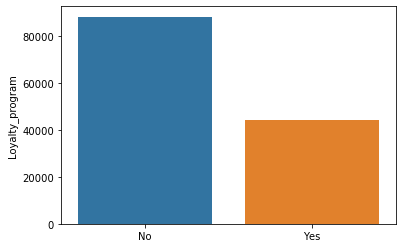

In [60]:
a = list(df['Loyalty_program'].unique())[0:1]+list(df['Loyalty_program'].unique())[2:]
b = df['Loyalty_program'].value_counts()
sns.barplot(a,b)

We cannot directly impute the missing values here with the mode which is **No** because then the distribution will be even more skewed. 

So let us impute values in a similar fashion as we did above


In [61]:
lpi = df.loc[df['Loyalty_program'].isnull()].index
lp1 = df['Loyalty_program'].value_counts()/len(df)
j,k = [i-1 for i in lpi],[i+1 for i in lpi]
lp2 = df.reindex(j)['Loyalty_program'].value_counts()/len(j)
lp3 = df.reindex(k)['Loyalty_program'].value_counts()/len(k)

In [62]:
lp1

No     0.588276
Yes    0.293491
Name: Loyalty_program, dtype: float64

In [63]:
lp2

No     0.586639
Yes    0.292445
Name: Loyalty_program, dtype: float64

In [64]:
lp3

No     0.587090
Yes    0.291881
Name: Loyalty_program, dtype: float64

In [65]:
print(sum(lp1-lp2),sum(lp1-lp3))

0.0026833799062424 0.0027962276182549872


Here the method which is slightly better is lp2 or nan-1 or the method of ffill() again

In [66]:
df['Loyalty_program'].ffill(inplace=True)

In [67]:
df.isnull().sum()

Id                     0
State                  0
Age                    0
Occupation         42676
Income_group           0
Customer_since         0
Loyalty_program        0
Past_purchase          0
Purchase               0
dtype: int64

Now, that we have treated all the null values in all columns except for the **Occupation**, let us treat these null values by using Super vised Machine Learning

### Let us use "Occupation" column as Y while all the remaining columns as X. The train dataset consists of all non null values of Y while the test dataset consists of all null values of Y 

Let us rename the occupation column and assign numbers accordingly.

Self employed : 0
Salaried      : 1
Business      : 2

Let us create the encodings for other categorical variables as well. I won't be encoding the **State** column as using encoding on it might introduce the **Curse of Dimensionality**

In [68]:
df = df.join(pd.get_dummies(df['Income_group']))
df

,Id,State,Age,Occupation,Income_group,Customer_since,Loyalty_program,Past_purchase,Purchase,High,Low,Medium
0,1,Uttar Pradesh,28,NaN,Low,2018,No,4937,No,0,1,0
1,2,Madhya Pradesh,27,Salaried,Low,2018,No,10834,No,0,1,0
2,3,West Bengal,62,NaN,High,2013,No,8610,Yes,1,0,0
3,4,Tamil Nadu,27,Salaried,Low,2018,No,14374,Yes,0,1,0
4,5,Uttar Pradesh,40,Self employed,High,2015,No,13158,No,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,Assam,29,Salaried,Low,2017,No,6241,No,0,1,0
149996,149997,Andhra Pradesh,53,Self employed,Medium,2010,No,29447,No,0,0,1
149997,149998,Odisha,31,NaN,Low,2018,No,4856,No,0,1,0
149998,149999,Andhra Pradesh,54,Self employed,High,2010,Yes,10031,Yes,1,0,0


In [69]:
df= df.join(pd.get_dummies(df['Loyalty_program']))

In [70]:
df['Purchase'].replace({'No':0,'Yes':1},inplace=True)

In [71]:
df['Occupation'].replace({'Self employed':0,'Salaried':1,'Business':2},inplace=True)

In [72]:
nndf = df.loc[df['Occupation'].isnull()!=True]
ndf = df.loc[df['Occupation'].isnull()!=False]
nndf

,Id,State,Age,Occupation,Income_group,Customer_since,Loyalty_program,Past_purchase,Purchase,High,Low,Medium,No,Yes
1,2,Madhya Pradesh,27,1.0,Low,2018,No,10834,0,0,1,0,1,0
3,4,Tamil Nadu,27,1.0,Low,2018,No,14374,1,0,1,0,1,0
4,5,Uttar Pradesh,40,0.0,High,2015,No,13158,0,1,0,0,1,0
5,6,Maharashtra,28,1.0,Low,2018,No,5159,0,0,1,0,1,0
7,8,Maharashtra,45,0.0,Medium,2018,No,5018,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149992,149993,Maharashtra,43,0.0,Medium,2014,Yes,14001,0,0,0,1,0,1
149994,149995,Karnataka,44,0.0,High,2013,Yes,7112,0,1,0,0,0,1
149995,149996,Assam,29,1.0,Low,2017,No,6241,0,0,1,0,1,0
149996,149997,Andhra Pradesh,53,0.0,Medium,2010,No,29447,0,0,0,1,1,0


In [73]:
X_train, y_train = nndf.drop(['Occupation','State','Loyalty_program','Income_group'],axis=1),nndf['Occupation']
X_test = ndf.drop(['Occupation','State','Loyalty_program','Income_group'],axis=1)
y_test = ndf['Occupation']

In [74]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()


In [75]:
X_train

,Id,Age,Customer_since,Past_purchase,Purchase,High,Low,Medium,No,Yes
1,2,27,2018,10834,0,0,1,0,1,0
3,4,27,2018,14374,1,0,1,0,1,0
4,5,40,2015,13158,0,1,0,0,1,0
5,6,28,2018,5159,0,0,1,0,1,0
7,8,45,2018,5018,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
149992,149993,43,2014,14001,0,0,0,1,0,1
149994,149995,44,2013,7112,0,1,0,0,0,1
149995,149996,29,2017,6241,0,0,1,0,1,0
149996,149997,53,2010,29447,0,0,0,1,1,0


In [76]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [77]:
y_pred = rfc.predict(X_test)
y_pred

array([1., 1., 1., ..., 0., 1., 0.])

In [78]:
pd.Series(y_pred).value_counts()/len(y_pred)

0.0    0.593214
1.0    0.406177
2.0    0.000609
dtype: float64

In [79]:
a = df.loc[df['Occupation'].isnull()]
a['Occupation']=y_pred

C:\Users\Rahul M\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [111]:
df = pd.concat([a,nndf])
df

,Id,State,Age,Occupation,Income_group,Customer_since,Loyalty_program,Past_purchase,Purchase,High,Low,Medium,No,Yes
0,1,Uttar Pradesh,28,1.0,Low,2018,No,4937,0,0,1,0,1,0
2,3,West Bengal,62,1.0,High,2013,No,8610,1,1,0,0,1,0
6,7,Tamil Nadu,68,1.0,High,2010,No,12780,1,1,0,0,1,0
9,10,Tamil Nadu,67,1.0,High,2010,Yes,25120,1,1,0,0,0,1
12,13,Kerala,31,1.0,Low,2017,No,3853,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149992,149993,Maharashtra,43,0.0,Medium,2014,Yes,14001,0,0,0,1,0,1
149994,149995,Karnataka,44,0.0,High,2013,Yes,7112,0,1,0,0,0,1
149995,149996,Assam,29,1.0,Low,2017,No,6241,0,0,1,0,1,0
149996,149997,Andhra Pradesh,53,0.0,Medium,2010,No,29447,0,0,0,1,1,0


In [112]:
df.head(20)

,Id,State,Age,Occupation,Income_group,Customer_since,Loyalty_program,Past_purchase,Purchase,High,Low,Medium,No,Yes
0,1,Uttar Pradesh,28,1.0,Low,2018,No,4937,0,0,1,0,1,0
2,3,West Bengal,62,1.0,High,2013,No,8610,1,1,0,0,1,0
6,7,Tamil Nadu,68,1.0,High,2010,No,12780,1,1,0,0,1,0
9,10,Tamil Nadu,67,1.0,High,2010,Yes,25120,1,1,0,0,0,1
12,13,Kerala,31,1.0,Low,2017,No,3853,0,0,1,0,1,0
17,18,Tamil Nadu,32,0.0,Medium,2016,No,6461,0,0,0,1,1,0
18,19,Tamil Nadu,63,1.0,Low,2013,No,12900,1,0,1,0,1,0
19,20,Chandigarh,52,0.0,Medium,2017,No,2801,0,0,0,1,1,0
20,21,Nagaland,73,0.0,High,2016,Yes,6960,0,1,0,0,0,1
21,22,Andaman and Nicobar Islands,68,0.0,Medium,2018,Yes,6852,0,0,0,1,0,1


In [113]:
df.to_csv('trainclean.csv')

### Data Cleaning Finished

# Exploratory Data Analysis

## Categorical Variable Analysis

### Occupation vs Target Variable

Text(0.5, 1.0, 'Occupation vs Purchase')

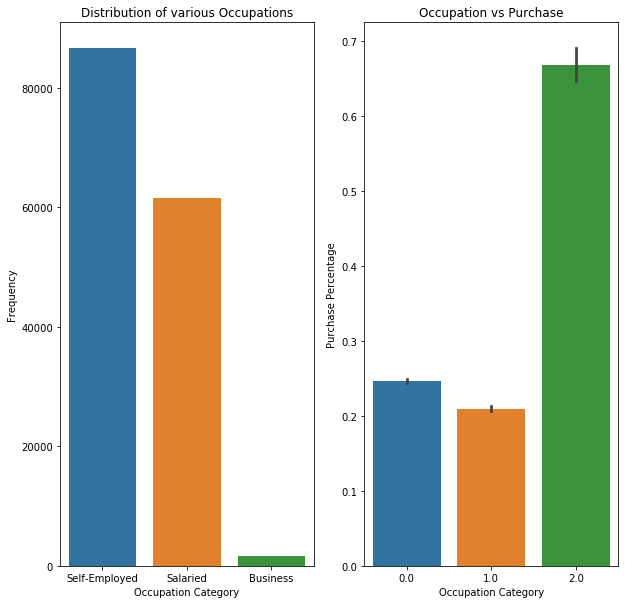

In [82]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
sns.barplot(['Self-Employed','Salaried','Business'],df['Occupation'].value_counts())
plt.xlabel('Occupation Category')
plt.ylabel('Frequency')
plt.title('Distribution of various Occupations')
plt.subplot(1,2,2)
sns.barplot(df['Occupation'],df['Purchase'])
plt.xlabel('Occupation Category')
plt.ylabel('Purchase Percentage')
plt.title('Occupation vs Purchase')

## Inferences


1. Business Customers are the least among the occupation categoy but the majority of them are going to buy a product from the store again.


2. Only around 20% of the Salaried Customers are predicted to purchase a product at the store again


3. Self-employed people have been the highest category of customers but majority of them doesnt want to purchase a product again


**From this it is clear that the store has to roll in some benefits for Business customers to reap profits and also to change some policies regarding Self-Employed customers as their number is higher**

### Income_Group vs Target Variable

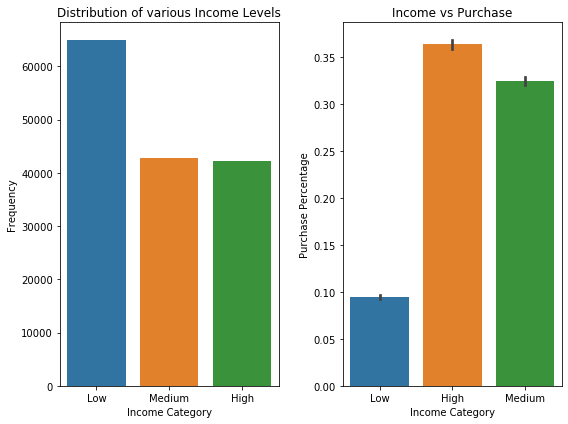

In [83]:
import random
plt.figure(figsize=(8,6))
colors,cs = [],[]



plt.subplot(1,2,1)
sns.barplot(['Low','Medium','High'],df['Income_group'].value_counts())
plt.xlabel('Income Category')
plt.ylabel('Frequency')
plt.title('Distribution of various Income Levels')
plt.subplot(1,2,2)
sns.barplot(df['Income_group'],df['Purchase'])
plt.xlabel('Income Category')
plt.ylabel('Purchase Percentage')
plt.title('Income vs Purchase')
plt.tight_layout()

## Inferences:

1. Low Income category customers are the most in terms of number while their purchase percentage is very less approximately 10% as expected.



2. Meanwhile the number of Medium income category is slightly less than High income ones and their purchase percentage is nearly 30%



3. High income category people are the least in this dataset but their contribution towards the purchase is highest as expected generally.


So, theres nothing abnormal in this trend as this is expected generally

### Loyalty Customer vs Target Variable

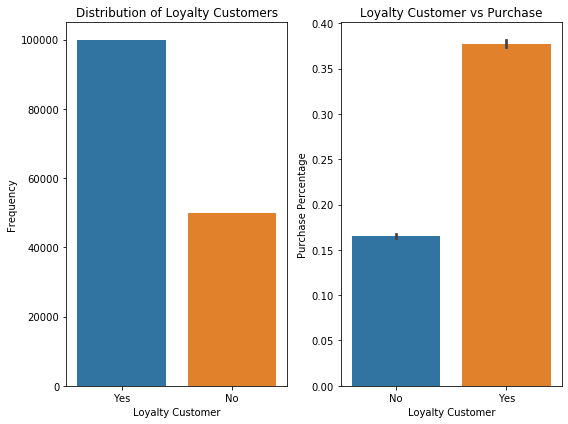

In [84]:
import random
plt.figure(figsize=(8,6))




plt.subplot(1,2,1)
sns.barplot(['Yes','No'],df['Loyalty_program'].value_counts())
plt.xlabel('Loyalty Customer')
plt.ylabel('Frequency')
plt.title('Distribution of Loyalty Customers')
plt.subplot(1,2,2)
sns.barplot(df['Loyalty_program'],df['Purchase'])
plt.xlabel('Loyalty Customer')
plt.ylabel('Purchase Percentage')
plt.title('Loyalty Customer vs Purchase')
plt.tight_layout()

## Inferences


1. Majority of the customers have subscribed to the Loyalty Program and out of those who haven't, only 16% of them are predicted to buy the product from the store.


2. The converse holds true in this case which means that, there is a probabilty of more than 35% of people buying the product who have subscribed to the loyalty program.


So, the store can conduct a survey of **Why did'nt you subscribe to the Loyalty Program?"** and can use that information to get more people into the Loyalty Program which automatically increases the chance of buying the next product

## Numerical Variable Analysis

### Age vs Target Variable

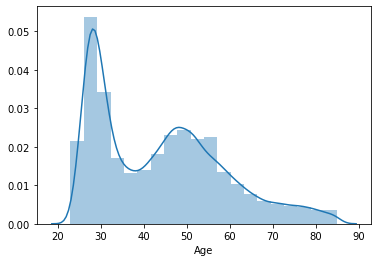

In [85]:
sns.distplot(df['Age'],bins=20)

From this distribution plot, we can see that the ages of customers are fairly spread and majority of the customers lie in the age range of 20-30

Now, let us try to segregate the **Age** into various sub-categories to make the analysis against **Purchase** easier

In [86]:
print(df['Age'].min(),df['Age'].max())


#the minimum age is 23 while the maximum is 85

23 85


In [87]:
def agerange(i):
    
        if i>=20 and i<30:
            return '20-30'
        if i>=30 and i<40:
            return '30-40'
        if i>=40 and i<50:
            return '40-50'
        if i>=50 and i<60:
            return '50-60'
        if i>=60 and i<70:
            return '60-70'
        if i>=70 and i<86:
            return '70-85'
df['Age_range'] = df['Age'].apply(lambda x: agerange(x))

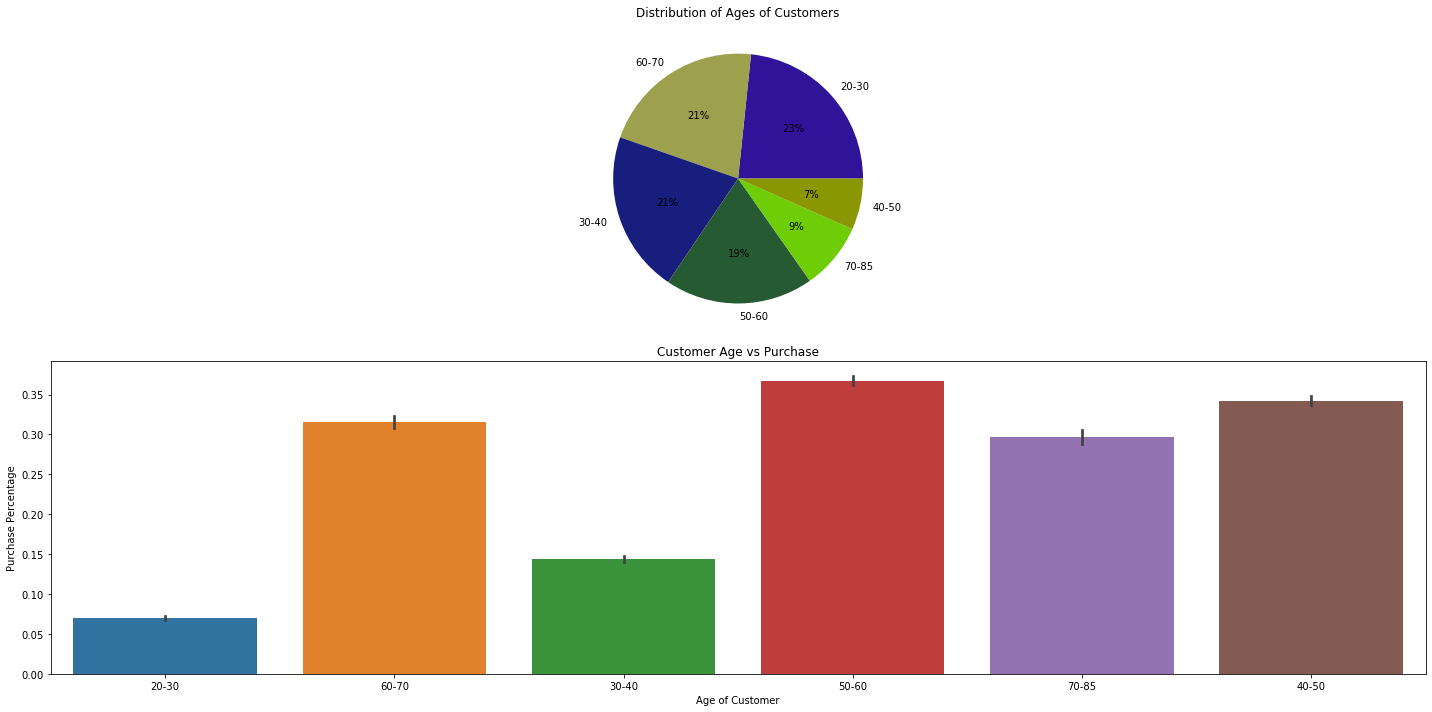

In [89]:
plt.figure(figsize=(20,10))




plt.subplot(2,1,1)

colors = []

for i in range(6):
    colors.append((random.uniform(0,1),random.uniform(0,1),random.uniform(0,1)))

plt.pie(df['Age_range'].value_counts(),colors=colors,labels=df['Age_range'].unique(),autopct='%.0f%%')
plt.title('Distribution of Ages of Customers')
plt.subplot(2,1,2)
sns.barplot(df['Age_range'],df['Purchase'])
plt.xlabel('Age of Customer')
plt.ylabel('Purchase Percentage')
plt.title('Customer Age vs Purchase')
plt.tight_layout()

### Inferences:


1. The pie chart reveals the distribution of Age Ranges of the customers. Customers mostly belong to the age groups of 20-30 years (22%), 60-70 years (20%) followed by 30-40 years(19%) and 50-60 years(18%)


2. Coming to the purchase percentage, **although majority of people belong to 20-30 years, the percentage of purchase among their total is quite less almost 6%**


3. The highest purchase percentage among the age groups belongs to the customers in **50-60** and **40-50** years closely followed by **60-70** and **70-85** years



**So, the general inference is that as customer's age crosses 30-40 years, majority of them tend to spend more**

### Customers_since vs Purchase

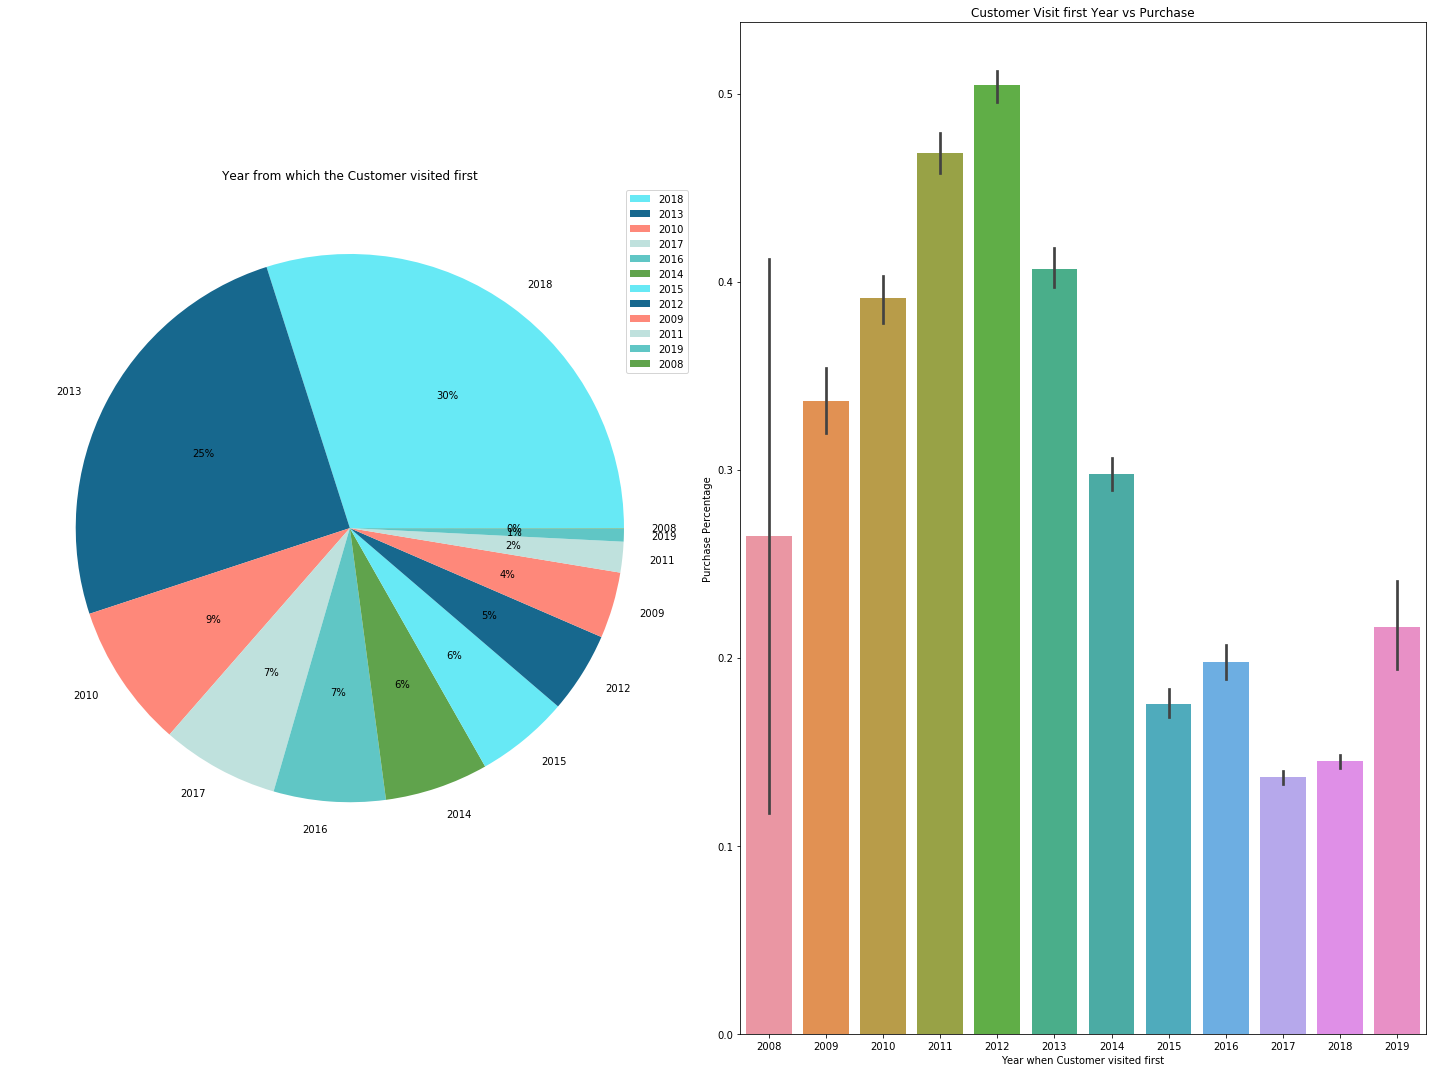

In [90]:
plt.figure(figsize=(20,15))




plt.subplot(1,2,1)

colors = []

for i in range(6):
    colors.append((random.uniform(0,1),random.uniform(0,1),random.uniform(0,1)))

plt.pie(df['Customer_since'].value_counts(),colors=colors,labels=df['Customer_since'].unique(),autopct='%.0f%%')
plt.legend()
plt.title('Year from which the Customer visited first')
plt.subplot(1,2,2)
sns.barplot(df['Customer_since'],df['Purchase'])
plt.xlabel('Year when Customer visited first')
plt.ylabel('Purchase Percentage')
plt.title('Customer Visit first Year vs Purchase')
plt.tight_layout()

### Inferences:


1. From the distribution pie chart, we can clearly see that **more than 50% of customers started visting the store from the year 2013 and 2018**


2. Rest all years are less than 10%


3. From the bar chart, we can make out that **customers who started visiting from year 2012 have been the most loyal ones with 50% of them buying the product**


4. This is followed by 2011 and 2013 in which more than 40% people are expected to buy the next product while 2017 and 2018 hadthe lowest with only 15% of people willing to buy the product

## Past_purchase vs Purchase

Let us create some bins for the past purchase column and then compare with the Purchase column

In [88]:
print(df['Past_purchase'].min(),df['Past_purchase'].max())

208 103520


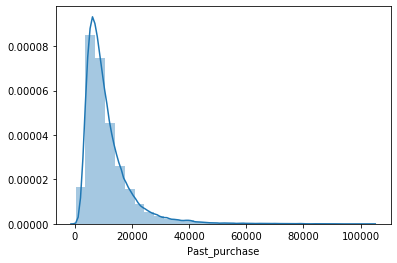

In [89]:
sns.distplot(df['Past_purchase'],bins=30)

From the plot and the maximum and minimum values, we can clearly see that the **Past_purchase column is highly skewed and from Rs. 40000, very less people have spent more than that**

So we can create the bins as follows

In [90]:
def ppbins(i):
    if i>=0 and i<5000:
        return '0-5000'
    if i>=5000 and i<10000:
        return '5000-10000'
    if i>=10000 and i<20000:
        return '10000-20000'
    if i>=20000 and i<30000:
        return '20000-30000'
    if i>=30000 and i<50000:
        return '30000-50000'
    if i>=50000:
        return '50000 and Above'
df['Past_amount'] = df['Past_purchase'].apply(lambda x: ppbins(x))

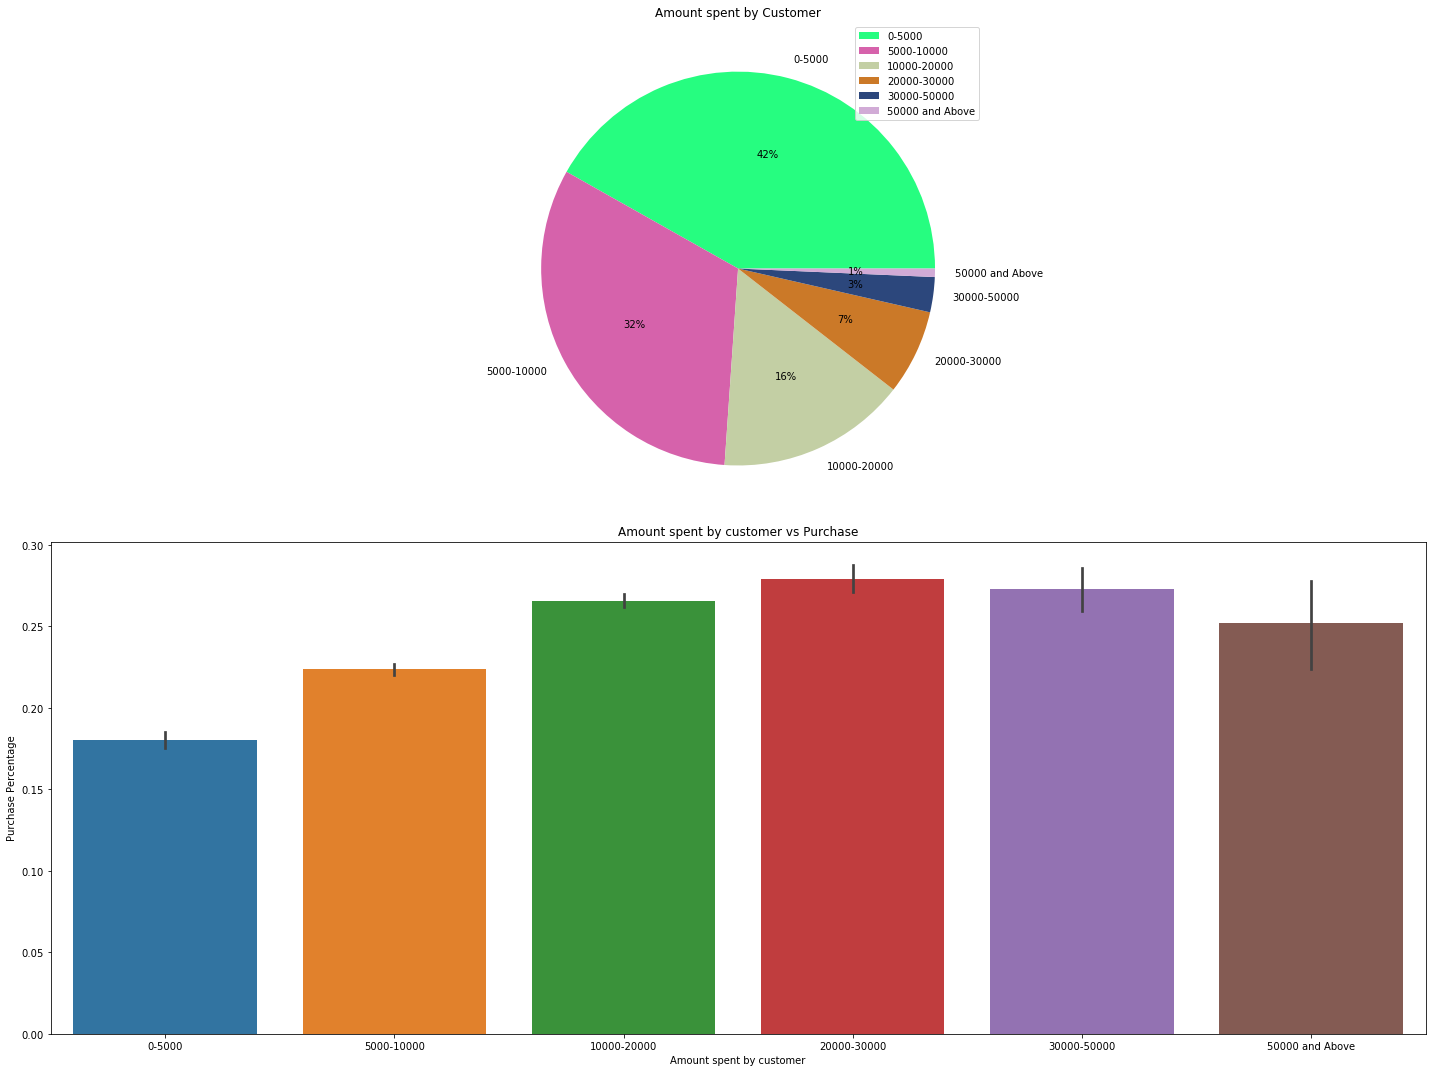

In [94]:
plt.figure(figsize=(20,15))




plt.subplot(2,1,1)

colors = []

for i in range(6):
    colors.append((random.uniform(0,1),random.uniform(0,1),random.uniform(0,1)))

plt.pie(df['Past_amount'].value_counts(),colors=colors,labels=df['Past_amount'].unique(),autopct='%.0f%%')
plt.legend()
plt.title('Amount spent by Customer')
plt.subplot(2,1,2)
sns.barplot(df['Past_amount'],df['Purchase'])
plt.xlabel('Amount spent by customer')
plt.ylabel('Purchase Percentage')
plt.title('Amount spent by customer vs Purchase')
plt.tight_layout()

### Inferences :


1. **Around 75% of the customers have previously spent the money in range of 0-Rs. 10000** which might suggest that most of the customers belong to the Lower income class as we saw from graphs above


2. **15% of the customers spent their money in the range of Rs 10000- Rs 20000** which might suggest that these people belong to the middle income class.


3. From this range, as the amount spent increases, the percentage of people is being reduced. This can be proved from the fact that **the data is highly right-skewed as shown in the Distribution plot**


4. But the Purchase_percent of all the categories of the customers is nearly in a similar range from **17% to 27%**. This means that **around 17-27 percentage of people from all the previous_purchase categories are planning to buy the next product**

# Insights, Assumptions and Inferences

**An important step in Exploratory Data Analysis is to come up with assumptions and questions and try to answer them with the data**

**Questions that I came up with, inorder to derive some interesting insights**

1. Which state has the highest chance to purchase the next product?


2. Which state had the highest **Past_purchase**?


3. Assumption: **Generally, people tend to spend more in their old age as they have nothing left to do**


4. Assumption: Higher the **age**, higher the **Past_purchase**


5. Assumption :- **Older Customers are mostly loyal**


6. Assumption: Past_purchase is less for low_income people and they dont usually belong to the Loyalty_program

## 1. Which State has the highest chance of purchasing the next product?

In [91]:
state = df.groupby('State')

#Grouping the data with respect to the State of the Customer

In [92]:
cols = df['State'].unique()
di = {}
for i in range(33):
    val = state['Purchase'].value_counts().loc[cols[i]][1]/len(df.loc[df['State']==cols[i]])
    di[cols[i]]=val


Text(0.5, 1.0, 'States vs Purchase')

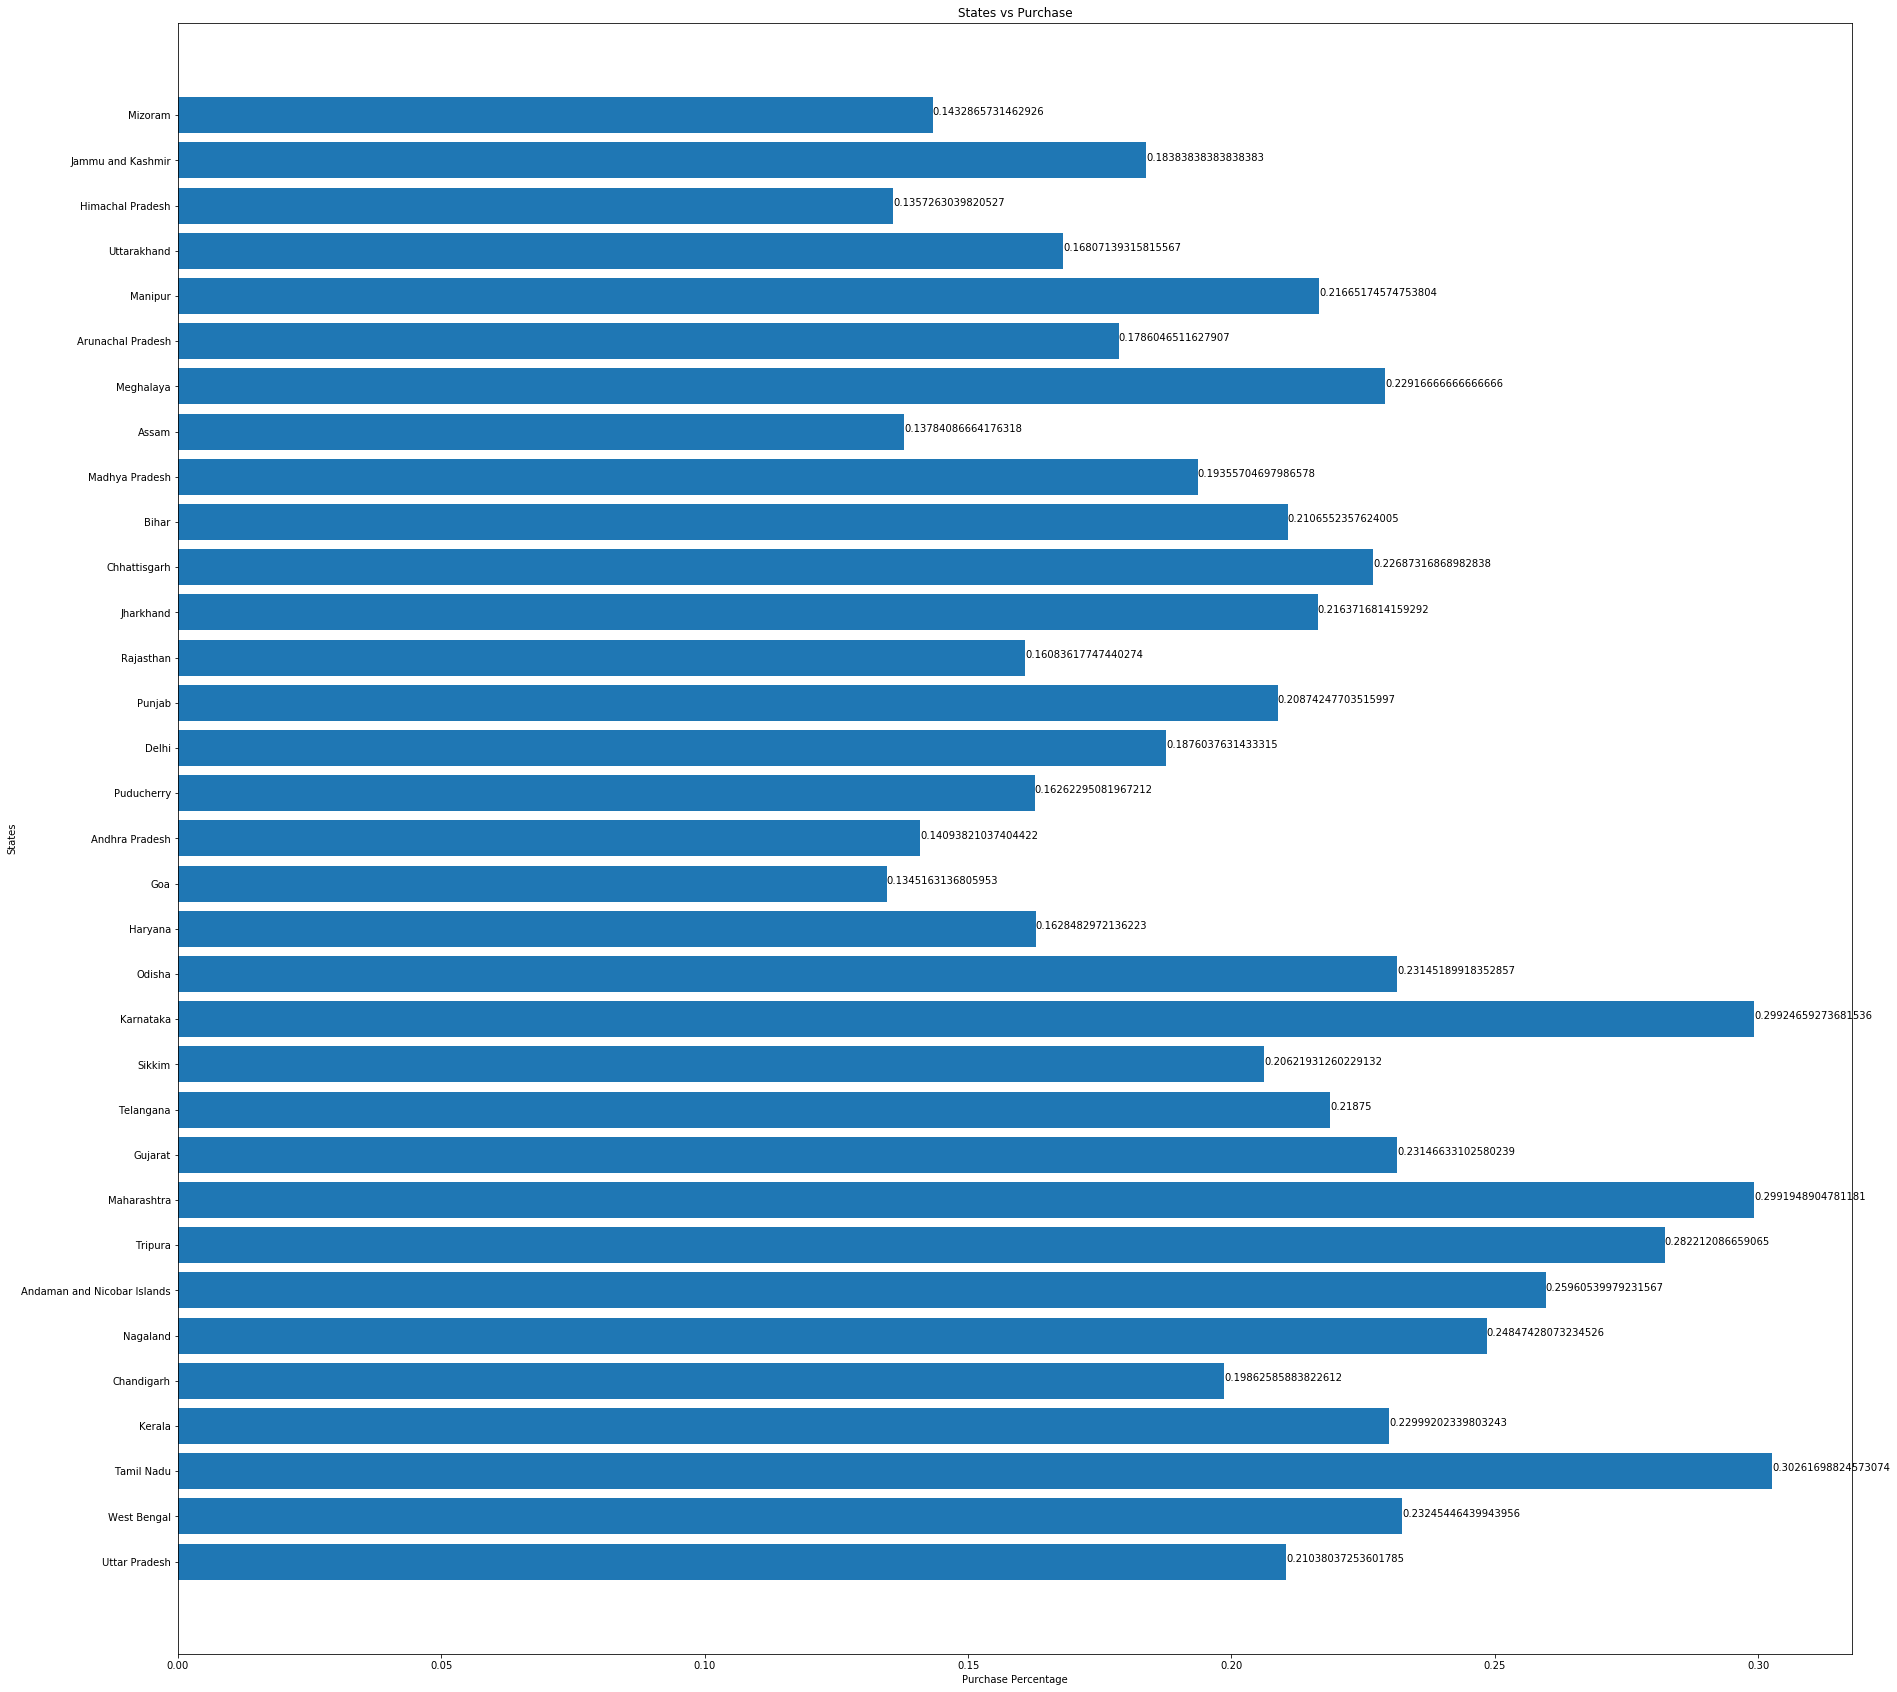

In [228]:
plt.figure(figsize=(30,30))
x = list(di.keys())
y = list(di.values())
plt.barh(x, y)

for index, value in enumerate(y):
    plt.text(value, index, str(value))
plt.xlabel('Purchase Percentage')
plt.ylabel('States')
plt.title('States vs Purchase')

In [241]:
sorlist = sorted(di.items(), key=lambda x:x[1])
sortdict = dict(sorlist)
sortdict

{'Goa': 0.1345163136805953,
 'Himachal Pradesh': 0.1357263039820527,
 'Assam': 0.13784086664176318,
 'Andhra Pradesh': 0.14093821037404422,
 'Mizoram': 0.1432865731462926,
 'Rajasthan': 0.16083617747440274,
 'Puducherry': 0.16262295081967212,
 'Haryana': 0.1628482972136223,
 'Uttarakhand': 0.16807139315815567,
 'Arunachal Pradesh': 0.1786046511627907,
 'Jammu and Kashmir': 0.18383838383838383,
 'Delhi': 0.1876037631433315,
 'Madhya Pradesh': 0.19355704697986578,
 'Chandigarh': 0.19862585883822612,
 'Sikkim': 0.20621931260229132,
 'Punjab': 0.20874247703515997,
 'Uttar Pradesh': 0.21038037253601785,
 'Bihar': 0.2106552357624005,
 'Jharkhand': 0.2163716814159292,
 'Manipur': 0.21665174574753804,
 'Telangana': 0.21875,
 'Chhattisgarh': 0.22687316868982838,
 'Meghalaya': 0.22916666666666666,
 'Kerala': 0.22999202339803243,
 'Odisha': 0.23145189918352857,
 'Gujarat': 0.23146633102580239,
 'West Bengal': 0.23245446439943956,
 'Nagaland': 0.24847428073234526,
 'Andaman and Nicobar Islands': 0

### Tamilnadu, Karnataka, Maharashtra, Tripura and Andaman and Nicobar Islands have the highest possibilty of purchasing the next product based on the percentage of living  there

## 2. Which State had the highest Past_purchase?

In [242]:
di = {}
for i in range(33):
    val = state['Past_purchase'].agg(['min','max','mean']).loc[cols[i]]
    di[cols[i]]=val
di

{'Uttar Pradesh': min       484.000000
 max     92168.000000
 mean    14021.498885
 Name: Uttar Pradesh, dtype: float64,
 'West Bengal': min       993.000000
 max     62467.000000
 mean     7828.737358
 Name: West Bengal, dtype: float64,
 'Tamil Nadu': min        603.00000
 max     100077.00000
 mean     14616.23941
 Name: Tamil Nadu, dtype: float64,
 'Kerala': min       937.000000
 max     67326.000000
 mean     7365.700612
 Name: Kerala, dtype: float64,
 'Chandigarh': min       577.000000
 max     32009.000000
 mean     6245.804497
 Name: Chandigarh, dtype: float64,
 'Nagaland': min       596.000000
 max     87542.000000
 mean    13563.324324
 Name: Nagaland, dtype: float64,
 'Andaman and Nicobar Islands': min       484.000000
 max     39600.000000
 mean     7925.778816
 Name: Andaman and Nicobar Islands, dtype: float64,
 'Tripura': min       971.000000
 max     88545.000000
 mean    10678.246294
 Name: Tripura, dtype: float64,
 'Maharashtra': min        460.000000
 max     103520.00

Text(0.5, 1.0, 'Maximum Value of Past_purchase vs State')

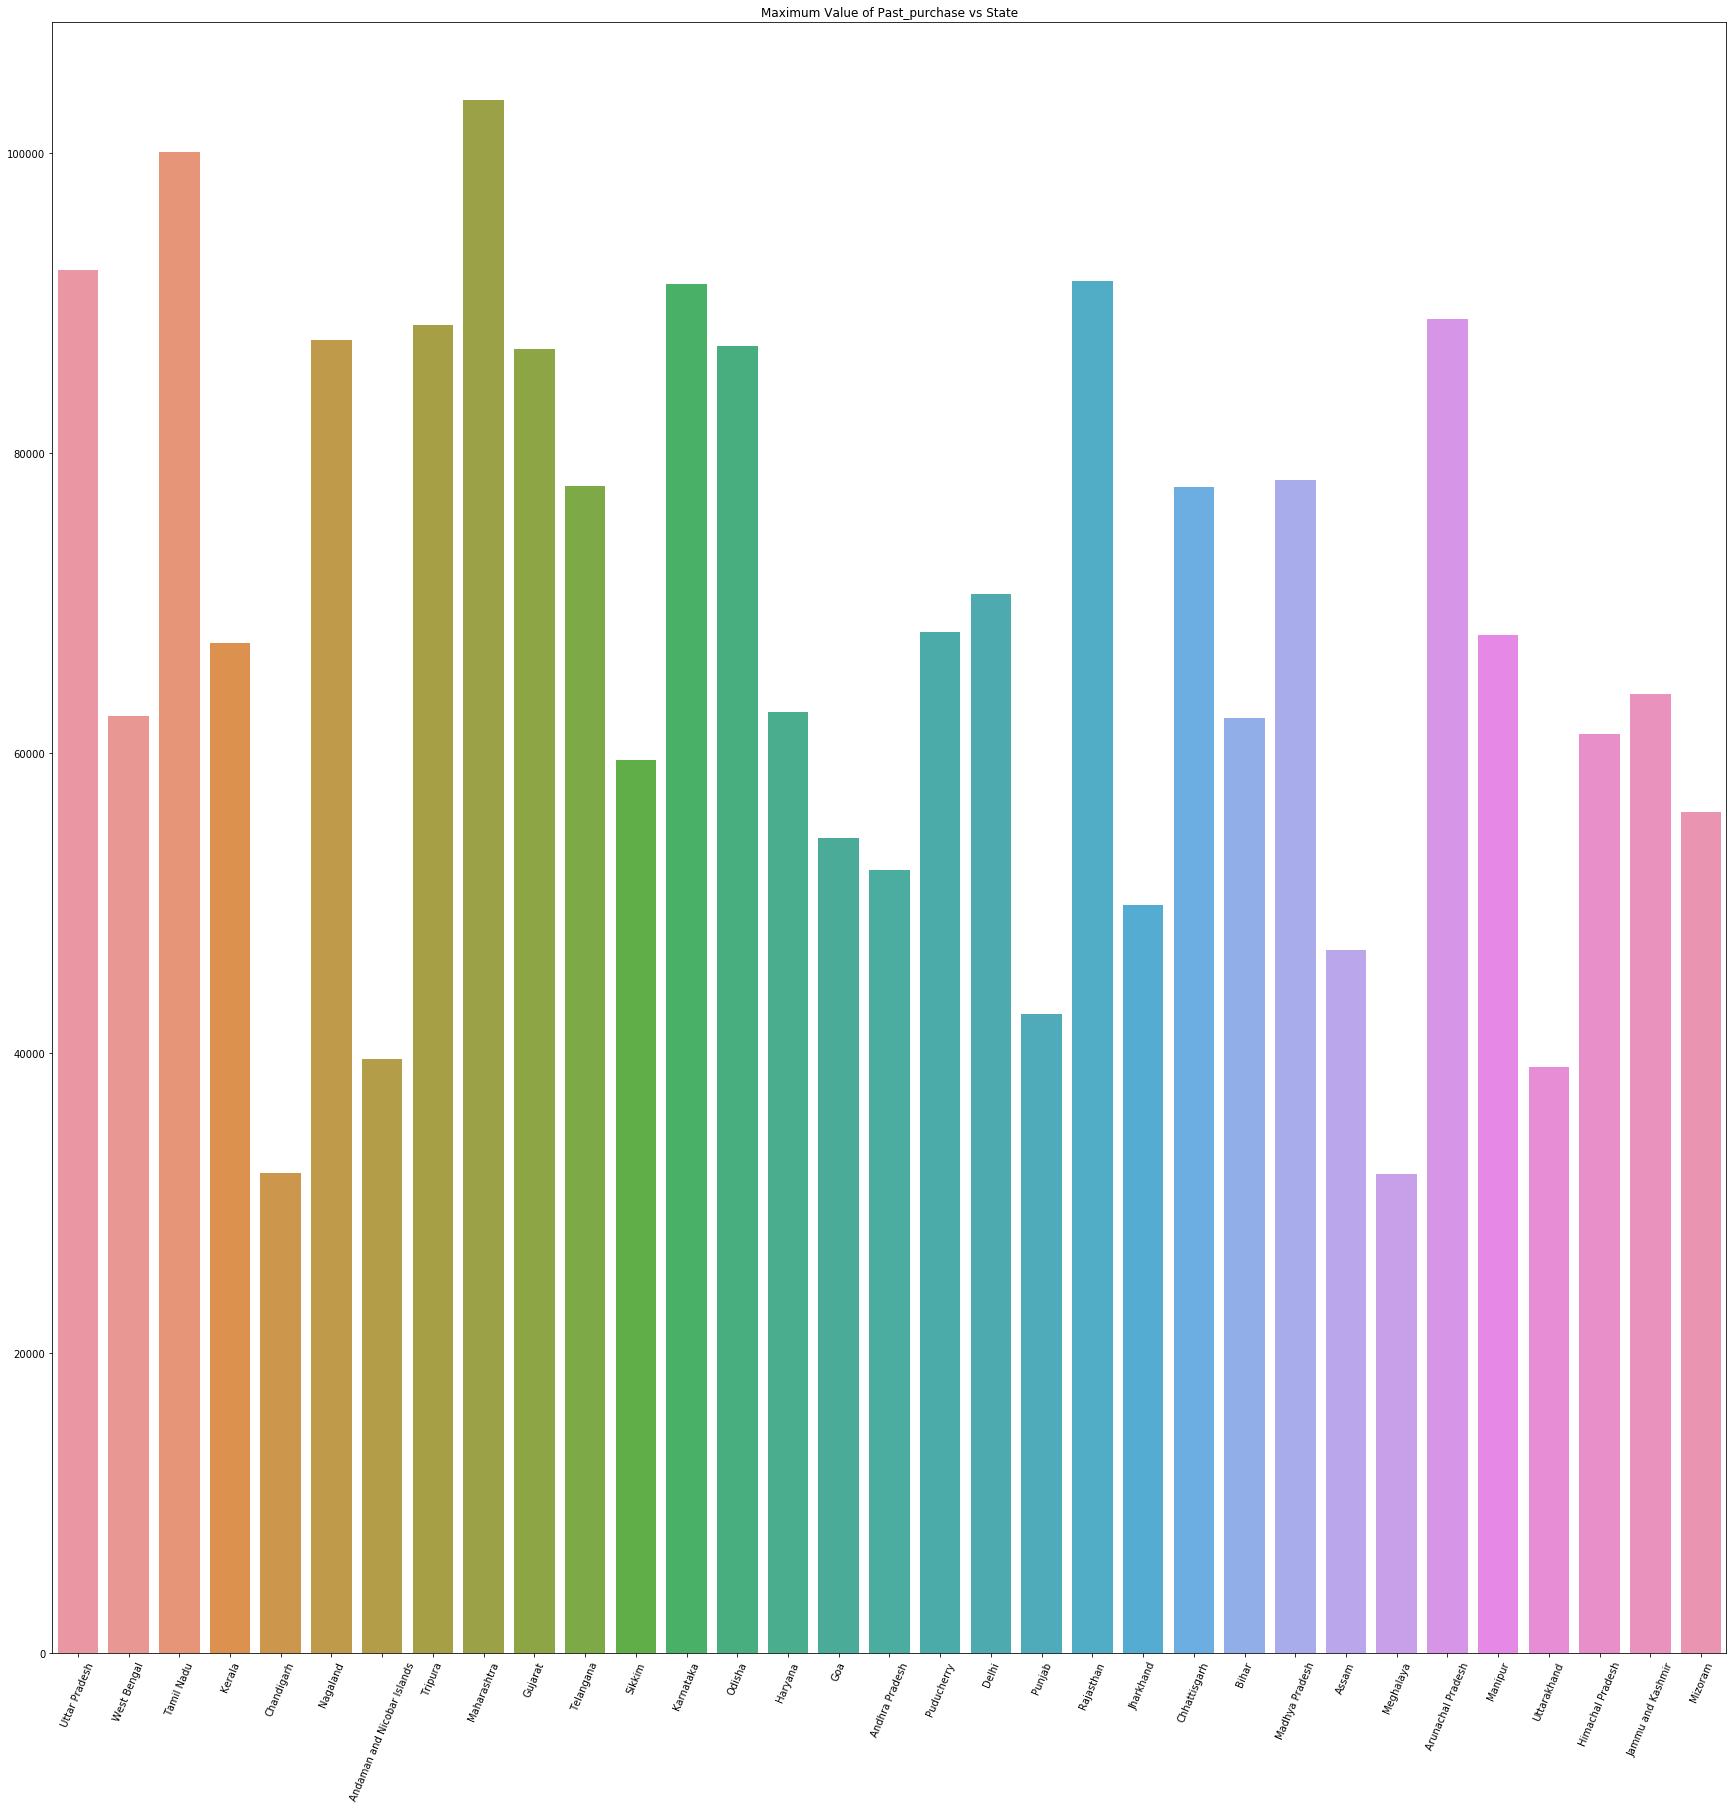

In [243]:
plt.figure(figsize=(30,30))
x = list(di.keys())
y = list(di.values())

maxvals = [y[i][1] for i in range(len(y))]
sns.barplot(x,maxvals)
plt.xticks(rotation=67)
plt.title('Maximum Value of Past_purchase vs State')

Text(0.5, 1.0, 'Mean Value of Past_purchase vs State')

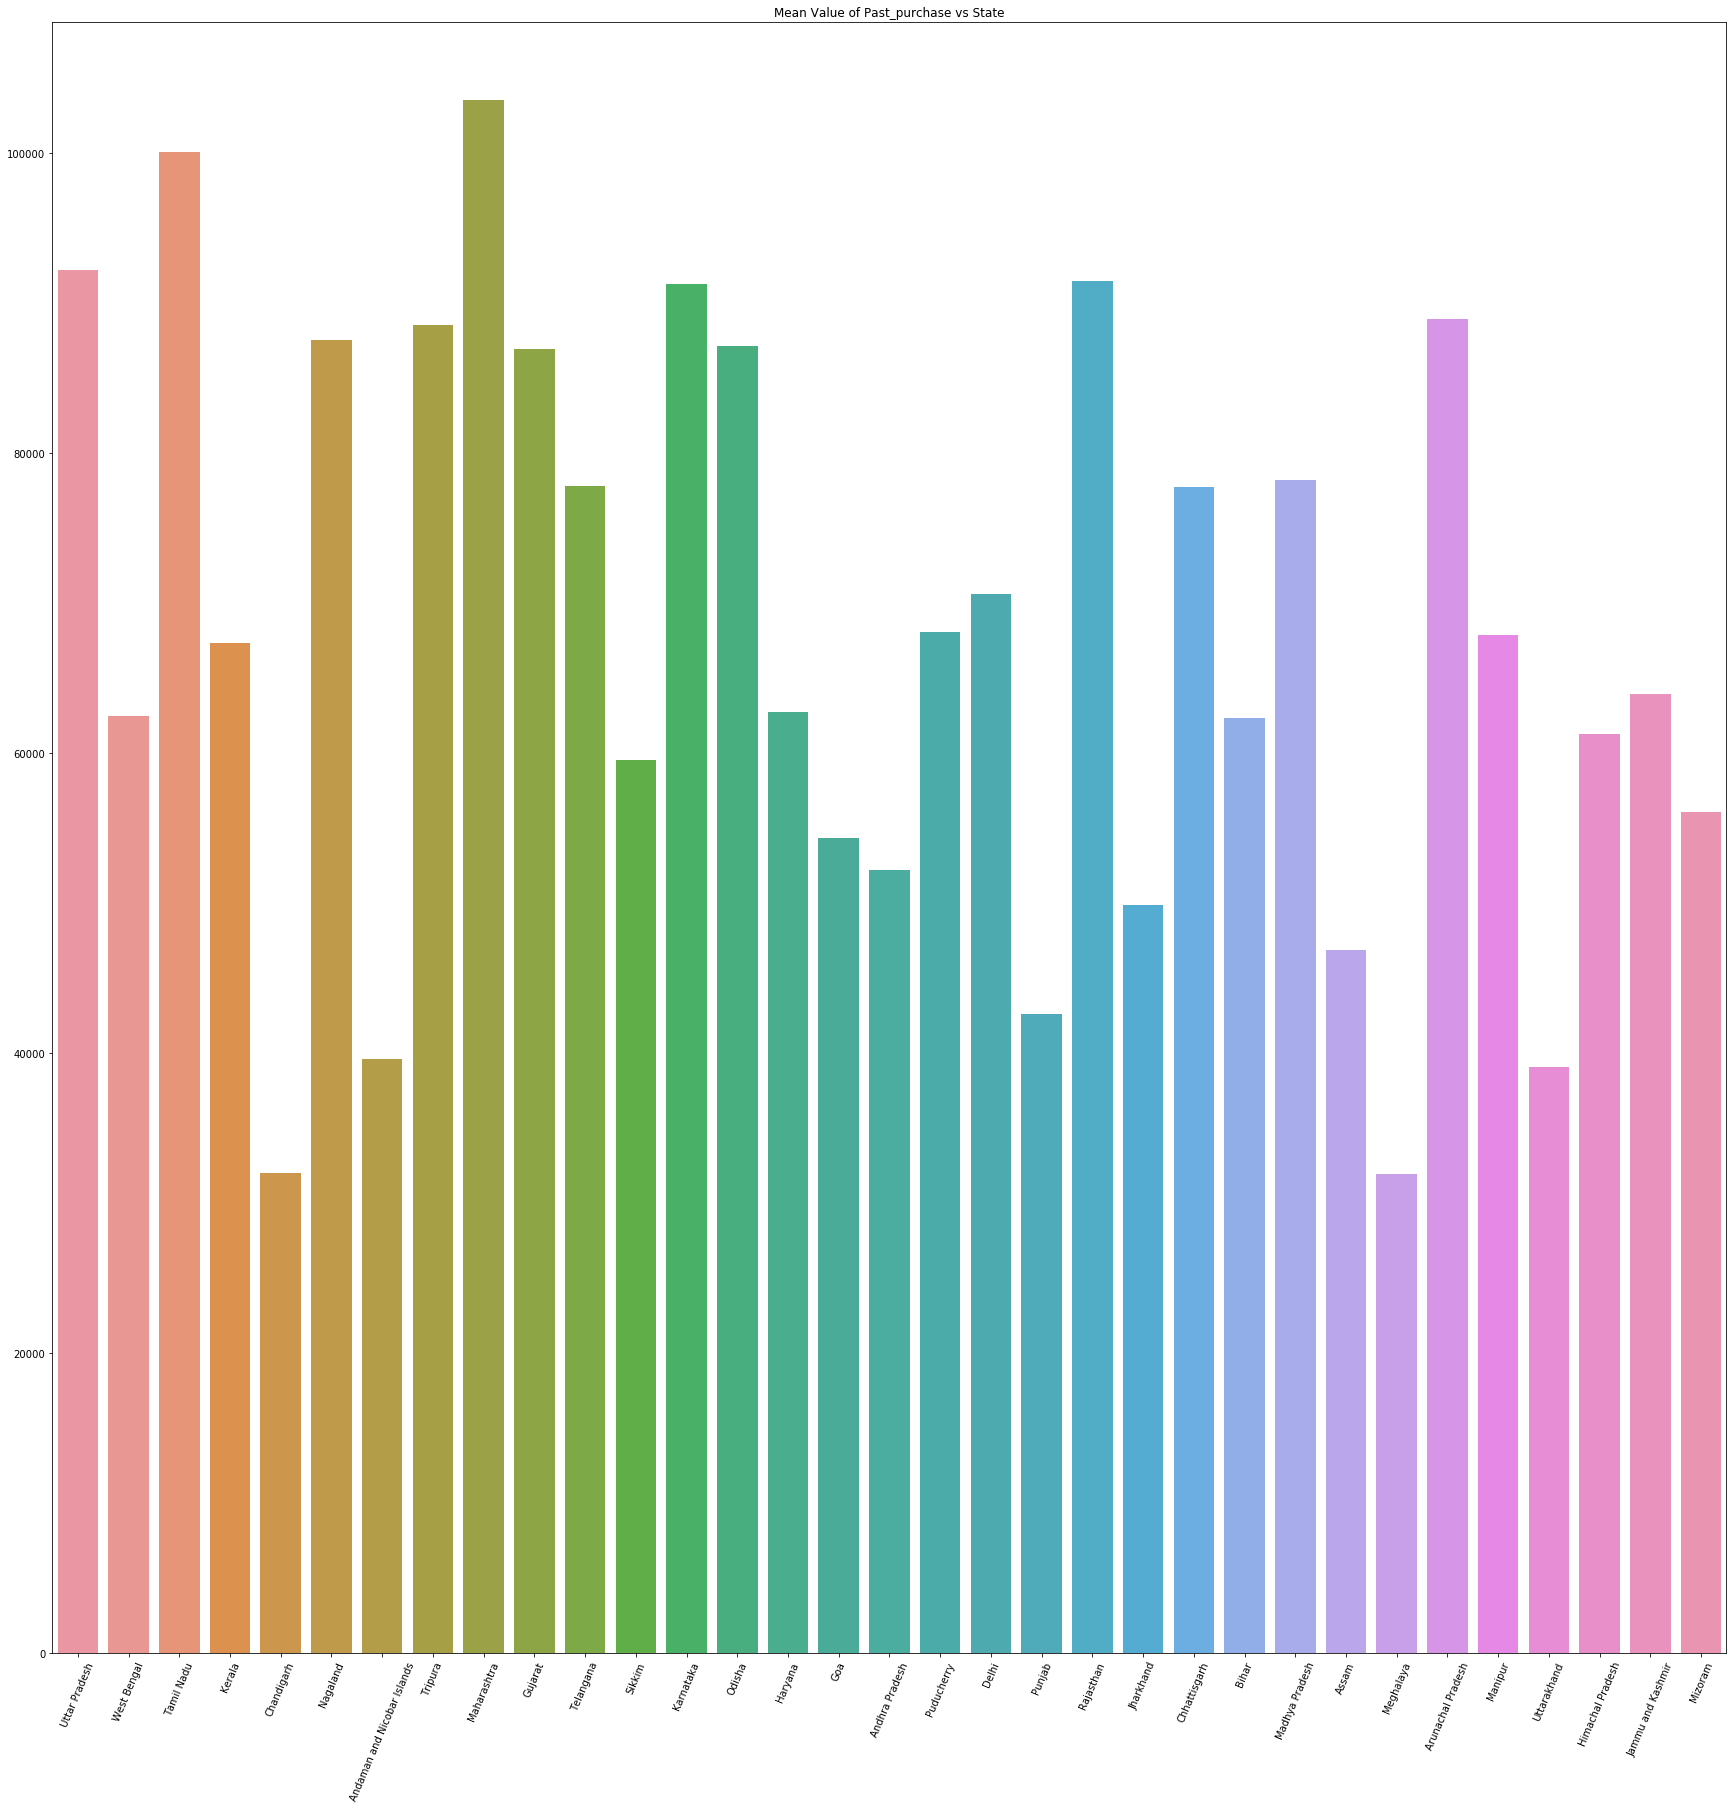

In [244]:
plt.figure(figsize=(30,30))
x = list(di.keys())
y = list(di.values())

meanvals = [y[i][2] for i in range(len(y))]
sns.barplot(x,maxvals)
plt.xticks(rotation=67)
plt.title('Mean Value of Past_purchase vs State')

In [245]:
d,d1 = {},{}
for i in range(len(x)):
    d[x[i]] = maxvals[i]
    d1[x[i]] = meanvals[i]
x,x1 = list(d.keys()),list(d1.keys())
y,y1 = list(d.values()),list(d1.values())

In [246]:
d

{'Uttar Pradesh': 92168.0,
 'West Bengal': 62467.0,
 'Tamil Nadu': 100077.0,
 'Kerala': 67326.0,
 'Chandigarh': 32009.0,
 'Nagaland': 87542.0,
 'Andaman and Nicobar Islands': 39600.0,
 'Tripura': 88545.0,
 'Maharashtra': 103520.0,
 'Gujarat': 86948.0,
 'Telangana': 77793.0,
 'Sikkim': 59499.0,
 'Karnataka': 91269.0,
 'Odisha': 87154.0,
 'Haryana': 62725.0,
 'Goa': 54299.0,
 'Andhra Pradesh': 52221.0,
 'Puducherry': 68048.0,
 'Delhi': 70605.0,
 'Punjab': 42594.0,
 'Rajasthan': 91479.0,
 'Jharkhand': 49840.0,
 'Chhattisgarh': 77748.0,
 'Bihar': 62307.0,
 'Madhya Pradesh': 78167.0,
 'Assam': 46884.0,
 'Meghalaya': 31967.0,
 'Arunachal Pradesh': 88913.0,
 'Manipur': 67877.0,
 'Uttarakhand': 39085.0,
 'Himachal Pradesh': 61282.0,
 'Jammu and Kashmir': 63958.0,
 'Mizoram': 56067.0}

In [251]:
print(dict(sorted(d.items(), key=lambda x:x[1])))

{'Meghalaya': 31967.0, 'Chandigarh': 32009.0, 'Uttarakhand': 39085.0, 'Andaman and Nicobar Islands': 39600.0, 'Punjab': 42594.0, 'Assam': 46884.0, 'Jharkhand': 49840.0, 'Andhra Pradesh': 52221.0, 'Goa': 54299.0, 'Mizoram': 56067.0, 'Sikkim': 59499.0, 'Himachal Pradesh': 61282.0, 'Bihar': 62307.0, 'West Bengal': 62467.0, 'Haryana': 62725.0, 'Jammu and Kashmir': 63958.0, 'Kerala': 67326.0, 'Manipur': 67877.0, 'Puducherry': 68048.0, 'Delhi': 70605.0, 'Chhattisgarh': 77748.0, 'Telangana': 77793.0, 'Madhya Pradesh': 78167.0, 'Gujarat': 86948.0, 'Odisha': 87154.0, 'Nagaland': 87542.0, 'Tripura': 88545.0, 'Arunachal Pradesh': 88913.0, 'Karnataka': 91269.0, 'Rajasthan': 91479.0, 'Uttar Pradesh': 92168.0, 'Tamil Nadu': 100077.0, 'Maharashtra': 103520.0}


In [252]:
print(dict(sorted(d1.items(), key=lambda x:x[1])))

{'Chandigarh': 6245.804497189257, 'Assam': 6388.37317893164, 'Goa': 6752.5409273039495, 'Himachal Pradesh': 6860.878295008412, 'Mizoram': 6922.465931863728, 'Sikkim': 6985.639934533551, 'Andhra Pradesh': 7028.184748915065, 'Chhattisgarh': 7060.471745500209, 'Kerala': 7365.700611539484, 'Puducherry': 7401.489180327869, 'Jammu and Kashmir': 7565.834343434343, 'West Bengal': 7828.737358298306, 'Andaman and Nicobar Islands': 7925.778816199377, 'Jharkhand': 8208.61371681416, 'Meghalaya': 8443.232371794871, 'Uttarakhand': 8509.977193852255, 'Odisha': 8621.858714944978, 'Madhya Pradesh': 8628.209932885906, 'Bihar': 8744.197795468463, 'Punjab': 8834.83275261324, 'Manipur': 8929.761862130707, 'Delhi': 9553.927504150526, 'Gujarat': 9763.040025173064, 'Rajasthan': 9805.584897610921, 'Haryana': 9834.635294117646, 'Telangana': 10132.278766556292, 'Tripura': 10678.24629418472, 'Arunachal Pradesh': 11971.767441860466, 'Nagaland': 13563.324324324325, 'Uttar Pradesh': 14021.498884803183, 'Maharashtra':

### The top 5 states based on Maximum Previous_purchase are Maharashtra, Tamil Nadu,UP, Rajasthan and Karnataka while the Mean states are Tamilnadu, Karnataka,Maharasthra, UP and Nagaland

## 3. Assumption : People tend to spend more in their old age since they dont have any reason to save

First, let us assume that **old age of people is from 50 years and above and try to plot this with respect to Past_purchase and Purchase column to see if our assumption is correct**

In [274]:
dfx = df.loc[(df['Age_range']=='50-60') | (df['Age_range']=='60-70') | (df['Age_range']=='70-85')]
dfx

,Id,State,Age,Occupation,Income_group,Customer_since,Loyalty_program,Past_purchase,Purchase,High,Low,Medium,No,Yes,Age_range,Past_amount
2,3,West Bengal,62,1.0,High,2013,No,8610,1,1,0,0,1,0,60-70,5000-10000
6,7,Tamil Nadu,68,1.0,High,2010,No,12780,1,1,0,0,1,0,60-70,10000-20000
9,10,Tamil Nadu,67,1.0,High,2010,Yes,25120,1,1,0,0,0,1,60-70,20000-30000
18,19,Tamil Nadu,63,1.0,Low,2013,No,12900,1,0,1,0,1,0,60-70,10000-20000
19,20,Chandigarh,52,0.0,Medium,2017,No,2801,0,0,0,1,1,0,50-60,0-5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149983,149984,Andaman and Nicobar Islands,58,0.0,Medium,2015,Yes,6981,1,0,0,1,0,1,50-60,5000-10000
149985,149986,Rajasthan,51,0.0,Medium,2016,Yes,10897,0,0,0,1,0,1,50-60,10000-20000
149988,149989,Maharashtra,63,1.0,Medium,2013,Yes,20978,1,0,0,1,0,1,60-70,20000-30000
149996,149997,Andhra Pradesh,53,0.0,Medium,2010,No,29447,0,0,0,1,1,0,50-60,20000-30000


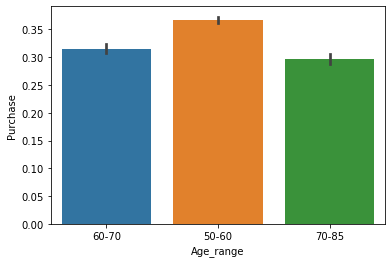

In [285]:
sns.barplot(dfx['Age_range'],dfx['Purchase'])

We can clearly see that in all these age-ranges, the percentage of Purchase is above 30% and the people of age 50-60 years tends to spend the most with purchase probability of 40%

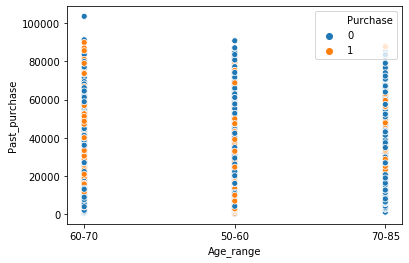

In [287]:
sns.scatterplot(dfx['Age_range'],dfx['Past_purchase'],hue=dfx['Purchase'])

From this scatterplot, it is evident that people in their old age tends to spend more money as we can see that the plot is densely populated within all the ranges of purchase_amount

### Assumption is indeed correct that Older people tend to spend higher than the average customer

## 4. Assumption: Higher the age, higher the Past_purchase

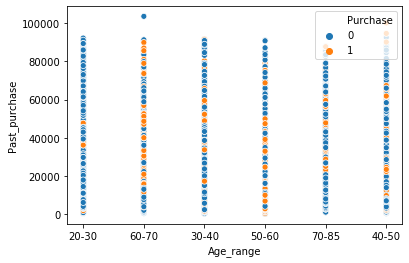

In [288]:
sns.scatterplot(df['Age_range'],df['Past_purchase'],hue=df['Purchase'])

With this plot, we can see the spread of the Past_purchases with respect to the age_groups but the distribution isnot clearly understandable

We can see that the customers belonging to the agr groups below 50 have less probability of purchasing the product which is an indication that our assumption is correct

Let us dig deeper and compare these columns with respect to the **Central Tendencies**

In [290]:
aaa = df.groupby('Age_range')['Past_purchase'].agg(['mean','min','max','std'])
aaa

,mean,min,max,std
Age_range,,,,
20-30,10115.489183,460,92168,7819.324664
30-40,10135.456068,457,91483,8012.319867
40-50,11089.084424,596,100077,8024.162553
50-60,12296.736178,208,90980,8685.481776
60-70,13104.174397,656,103520,9335.430696
70-85,13816.105523,1143,87851,10013.048353


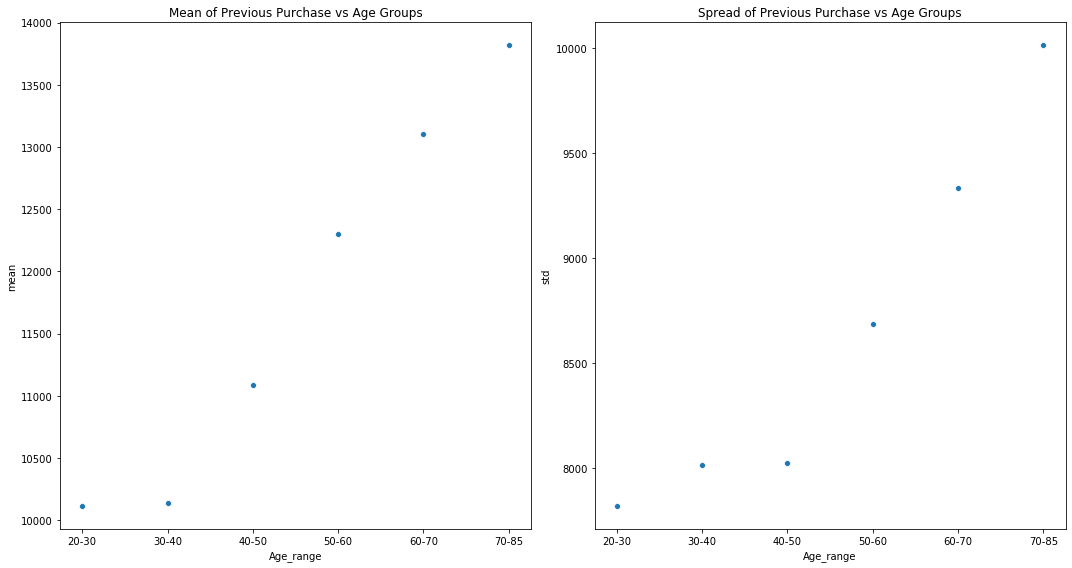

In [299]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.scatterplot(aaa.index,aaa['mean'])
plt.title('Mean of Previous Purchase vs Age Groups')
plt.subplot(1,2,2)
sns.scatterplot(aaa.index,aaa['std'])
plt.title('Spread of Previous Purchase vs Age Groups')
plt.tight_layout()

### Inferences:-

1. Judging from the mean of all age_groups, we can say that the age_groups have means in similar ranges so it doesnt reveal much


2. But we can see a clear **increase in the mean values of all age_groups which solidifies our assumptions**.


3. The minimum and maximum values are distributed arbbitrarily so there isnt much to infer from that.


4. From the standard deviations, we can see that they are increasing as the age_group increases. This means that the spending amount is also increasing as well 

### We can say that our assumption is indeed correct to a certain extent in this case

## 5. Assumption: Older Customers are most loyal

In [330]:
aaa = pd.DataFrame(df.groupby('Age_range')['Loyalty_program'].value_counts(normalize=True))
labels = list(df['Age_range'].unique())
valno,valyes = [],[]
for i in range(len(aaa['Loyalty_program'])):
    if i%2==0:
        valno.append(aaa['Loyalty_program'][i])
    else:
        valyes.append(aaa['Loyalty_program'][i])
aaa

Loyalty_program
Age_range Loyalty_program                 
20-30     No                      0.789432
          Yes                     0.210568
30-40     No                      0.760928
          Yes                     0.239072
40-50     No                      0.579411
          Yes                     0.420589
50-60     No                      0.561803
          Yes                     0.438197
60-70     No                      0.581092
          Yes                     0.418908
70-85     No                      0.624786
          Yes                     0.375214

No handles with labels found to put in legend.
No handles with labels found to put in legend.


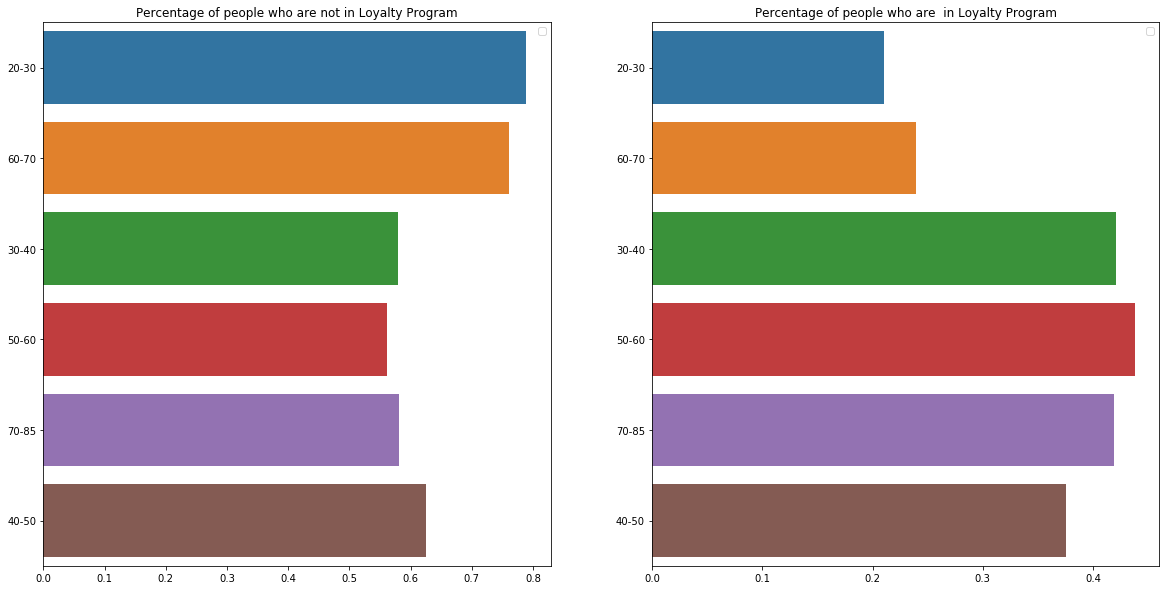

In [338]:
plt.figure(figsize=(20,10))
colors = []

for i in range(len(labels)):
    colors.append((random.uniform(0,1),random.uniform(0,1),random.uniform(0,1)))
plt.subplot(1,2,1)
sns.barplot(valno,labels)
plt.title('Percentage of people who are not in Loyalty Program')
plt.legend()
plt.subplot(1,2,2)
sns.barplot(valyes,labels)
plt.title('Percentage of people who are  in Loyalty Program')
plt.legend()

In [334]:
aaa

Loyalty_program
Age_range Loyalty_program                 
20-30     No                      0.789432
          Yes                     0.210568
30-40     No                      0.760928
          Yes                     0.239072
40-50     No                      0.579411
          Yes                     0.420589
50-60     No                      0.561803
          Yes                     0.438197
60-70     No                      0.581092
          Yes                     0.418908
70-85     No                      0.624786
          Yes                     0.375214

We can clearly see that, as the age group is increasing, the percentage of people who are in loyalty program steadily increased till age group of 50-60

### The assumption here is wrong as from age group 50-60, the percentage of people not in loyalty_program increased

## 6. Assumption: Past_purchase is less for low_income people and they dont usually belong to the Loyalty_program

Let us group the customers **based on Income_range** and see if the assumption made is true

In [340]:
dfy = df.groupby('Income_group')

In [345]:
asds = dfy['Past_purchase'].agg(['mean','min','max','std'])
asds

,mean,min,max,std
Income_group,,,,
High,12606.944659,763,103520,9055.778966
Low,10274.758144,457,100077,7993.300995
Medium,11360.256446,208,94599,8334.421983


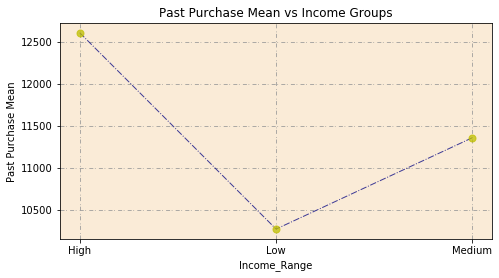

In [346]:
fig3 = plt.figure(figsize=(6,3))
axiss = fig3.add_axes([0,0,1,1]) #Using the full canvas
axiss.plot(asds.index, asds['mean'], color='navy', alpha=0.75, lw=1,marker='o',ls='-.',markersize=7,markerfacecolor='y',markeredgecolor='y')
axiss.set_xlabel('Income_Range')
axiss.set_ylabel('Past Purchase Mean')
axiss.set_title('Past Purchase Mean vs Income Groups')
axiss.grid(True,color='0.6',dashes=(5,2,1,4))
axiss.set_facecolor('#FAEBD7')

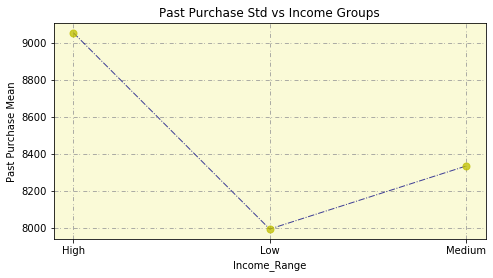

In [349]:
fig3 = plt.figure(figsize=(6,3))
axiss = fig3.add_axes([0,0,1,1]) #Using the full canvas
axiss.plot(asds.index, asds['std'], color='navy', alpha=0.75, lw=1,marker='o',ls='-.',markersize=7,markerfacecolor='y',markeredgecolor='y')
axiss.set_xlabel('Income_Range')
axiss.set_ylabel('Past Purchase Mean')
axiss.set_title('Past Purchase Std vs Income Groups')
axiss.grid(True,color='0.6',dashes=(5,2,1,4))
axiss.set_facecolor('#FAFAD7')

From both these plots, it is evident that, as the income_range keeps growing, the mean and standard deviation of Prevvious_purchases increase too.

**So, the first part of assumption is proved to be correct**

In [351]:
aaa = pd.DataFrame(df.groupby('Income_group')['Loyalty_program'].value_counts(normalize=True))
labels = list(df['Income_group'].unique())
valno,valyes = [],[]
for i in range(len(aaa['Loyalty_program'])):
    if i%2==0:
        valno.append(aaa['Loyalty_program'][i])
    else:
        valyes.append(aaa['Loyalty_program'][i])
aaa

Loyalty_program
Income_group Loyalty_program                 
High         No                      0.555189
             Yes                     0.444811
Low          No                      0.788767
             Yes                     0.211233
Medium       No                      0.592277
             Yes                     0.407723

No handles with labels found to put in legend.
No handles with labels found to put in legend.


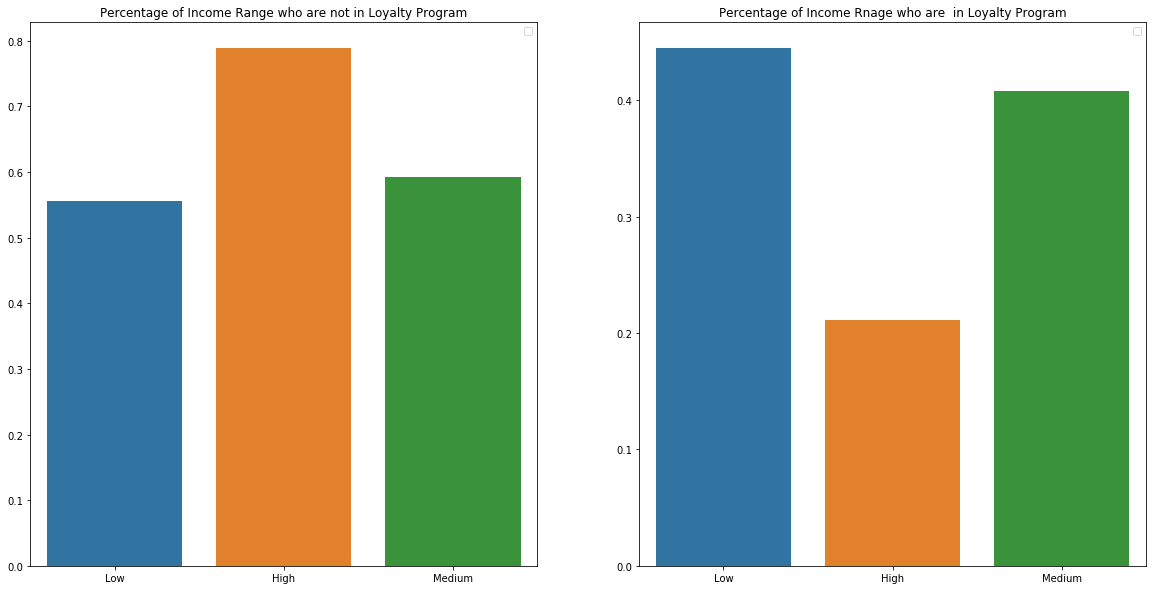

In [354]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.barplot(labels,valno)
plt.title('Percentage of Income Range who are not in Loyalty Program')
plt.legend()
plt.subplot(1,2,2)
sns.barplot(labels,valyes)
plt.title('Percentage of Income Rnage who are  in Loyalty Program')
plt.legend()

Both these graphs are complete contrast to each other and we can clearly see that **as income_group increases**, the percentage of people who are in loyalty_program also increases

## The Assumption is proven to be correct

# End of Exploratory Data Analysis